# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering 
from sklearn.metrics import silhouette_score 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px

# **3. Memuat Dataset**

In [221]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

## 1. Memahami Struktur Data

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [223]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [224]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [225]:
print("Jumlah baris duplikat: ", df.duplicated().sum())

Jumlah baris duplikat:  0


## 2. Data Cleaning dan Data Preprocessing

In [226]:
#Drop semua baris yamg memiliki missing data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [227]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Menghapus kolom ID karena bukan merupakan fitur

In [228]:
df = df.drop(columns='ID')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### Mendapatkan data usia pelanggan

In [229]:
df['Age'] = 2024 - df['Year_Birth']
df = df.drop(columns='Year_Birth')

### Membuat kolom baru 'Spending' untuk melihat total uang yang dikeluarkan pelanggan di semua produk

In [230]:
df['Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

### Membuat kolom baru 'Accept_Offer' untuk melihat frekuensi total pelanggan menerima tawaran

In [231]:
df['Accept_Offer'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

### Membuat kolom baru 'Num_Purchase' untuk melihat total frekuensi belanja

In [232]:
df['Num_Purchase'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

### Mengganti nama kolom NumWebVisitsMonth

In [233]:
df.rename(columns={'NumWebVisitsMonth': 'Web_Visit'}, inplace=True)

### Menyeragamkan value untuk Education

In [234]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [235]:
df['Education'] = df['Education'].replace({
    'Graduation':'Bachelor',
    '2n Cycle':'Master'
})
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

### Menyeragamkan value untuk Marital_Status

In [236]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [237]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd':'Single',
    'Alone':'Single',
    'YOLO':'Single',
    'Together':'Relationship'
})
df['Marital_Status'].unique()

array(['Single', 'Relationship', 'Married', 'Divorced', 'Widow'],
      dtype=object)

### Membuat kolom baru untuk melihat pelanggan sudah berapa lama berlangganan

In [238]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2216 non-null   object        
 1   Marital_Status       2216 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2216 non-null   int64         
 4   Teenhome             2216 non-null   int64         
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-null   i

In [239]:
max_date = df['Dt_Customer'].max()

df['Enrolled_Days'] = (max_date - df['Dt_Customer']).dt.days
df = df.drop(columns='Dt_Customer')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days
0,Bachelor,Single,58138.0,0,0,58,635,88,546,172,...,0,0,3,11,1,67,1617,1,25,663
1,Bachelor,Single,46344.0,1,1,38,11,1,6,2,...,0,0,3,11,0,70,27,0,6,113
2,Bachelor,Relationship,71613.0,0,0,26,426,49,127,111,...,0,0,3,11,0,59,776,0,21,312
3,Bachelor,Relationship,26646.0,1,0,26,11,4,20,10,...,0,0,3,11,0,40,53,0,8,139
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,3,11,0,43,422,0,19,161


### Membuat kolom baru untuk melihat total anak dari pelanggan

In [240]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns=['Kidhome', 'Teenhome'])
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,0,3,11,1,67,1617,1,25,663,0
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,0,3,11,0,70,27,0,6,113,2
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,0,3,11,0,59,776,0,21,312,0
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,0,3,11,0,40,53,0,8,139,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,3,11,0,43,422,0,19,161,1


### Drop baris yang memiliki data Income dan umur tidak wajar 

In [241]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,...,0.009477,3.0,11.0,0.150271,55.179603,607.075361,0.448556,14.880866,353.521209,0.947202
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,...,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.892440,7.670957,202.434667,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,3.0,11.0,0.000000,47.000000,69.000000,0.000000,8.000000,180.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,...,0.000000,3.0,11.0,0.000000,54.000000,396.500000,0.000000,15.000000,355.500000,1.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,3.0,11.0,0.000000,65.000000,1048.000000,1.000000,21.000000,529.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,3.0,11.0,1.000000,131.000000,2525.000000,5.000000,44.000000,699.000000,3.000000


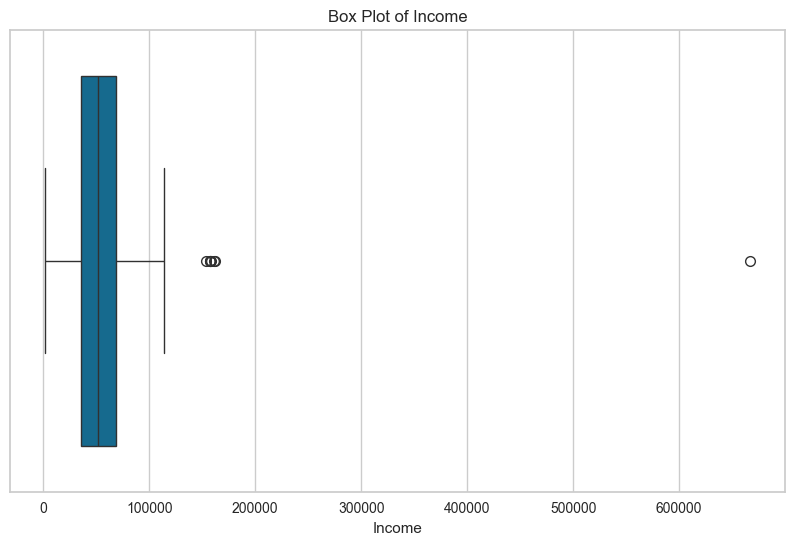

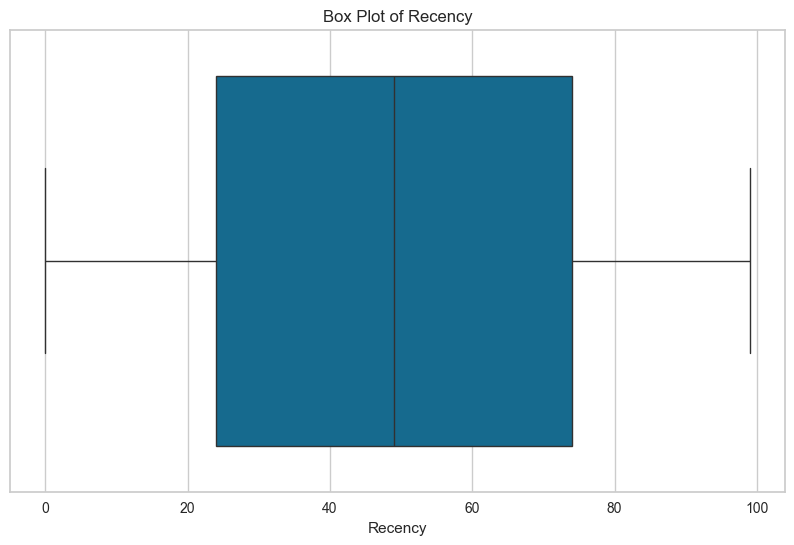

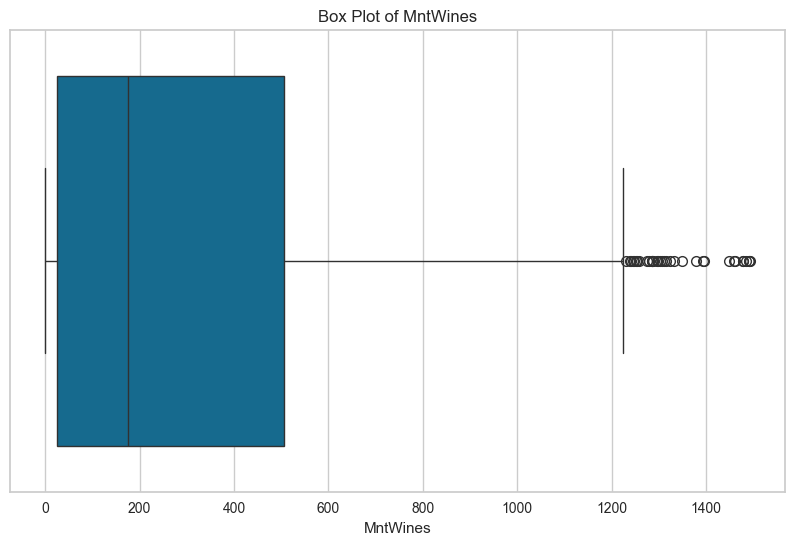

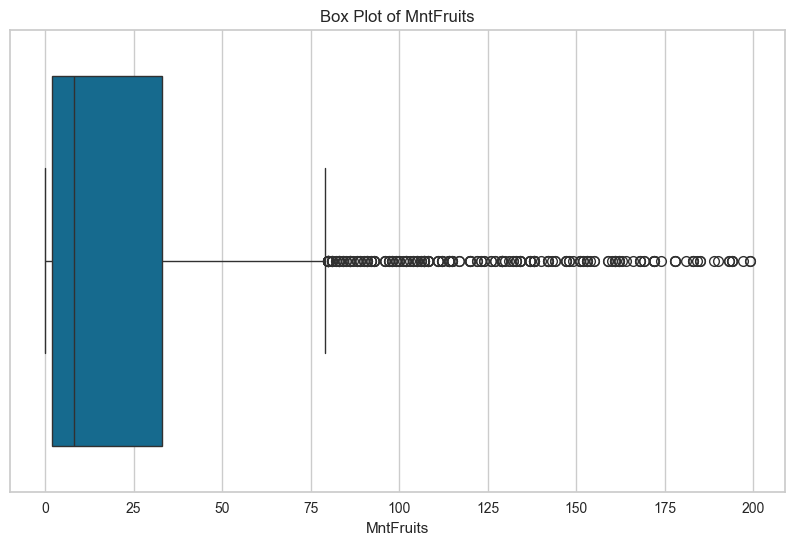

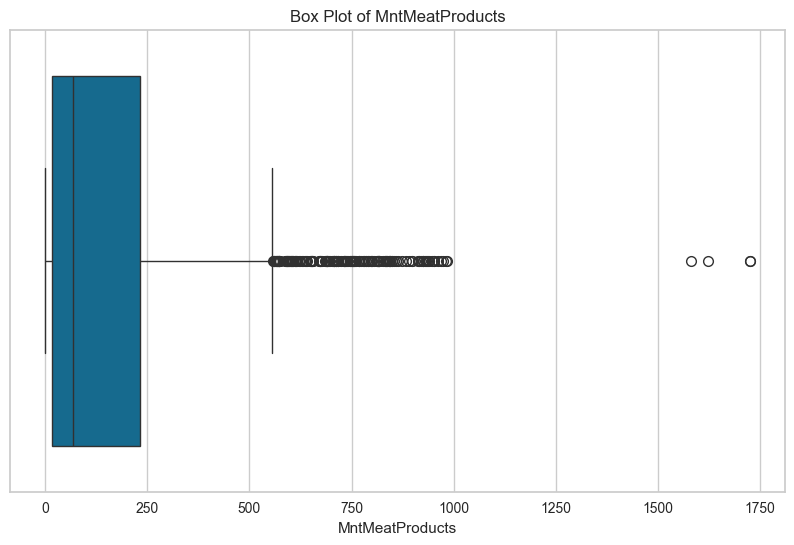

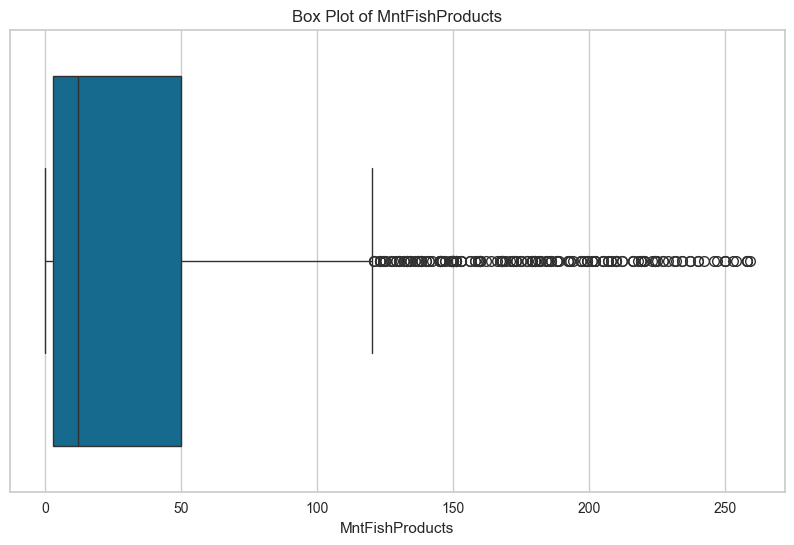

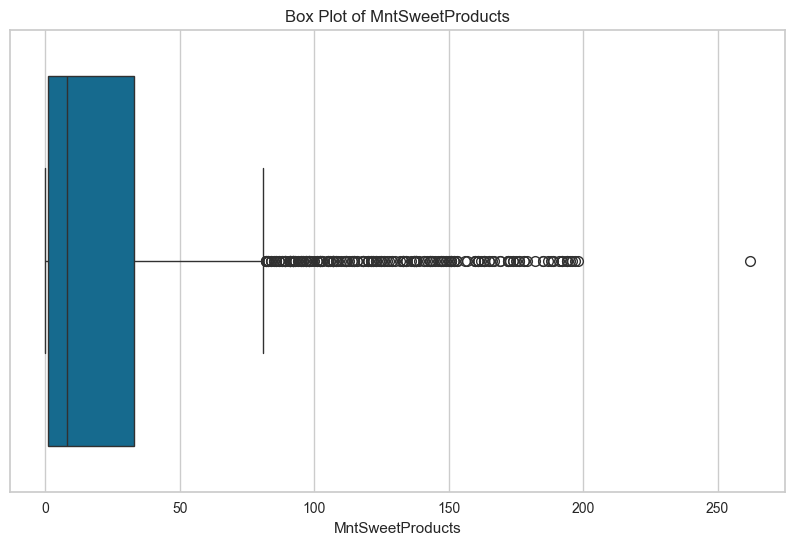

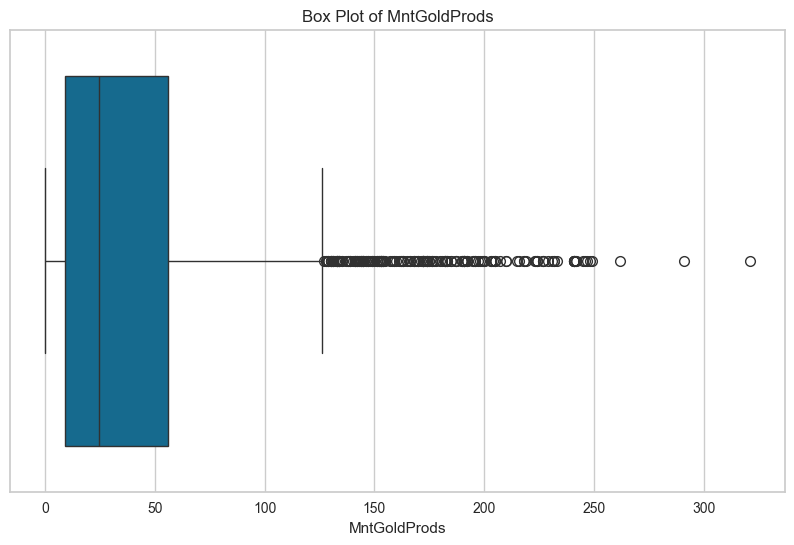

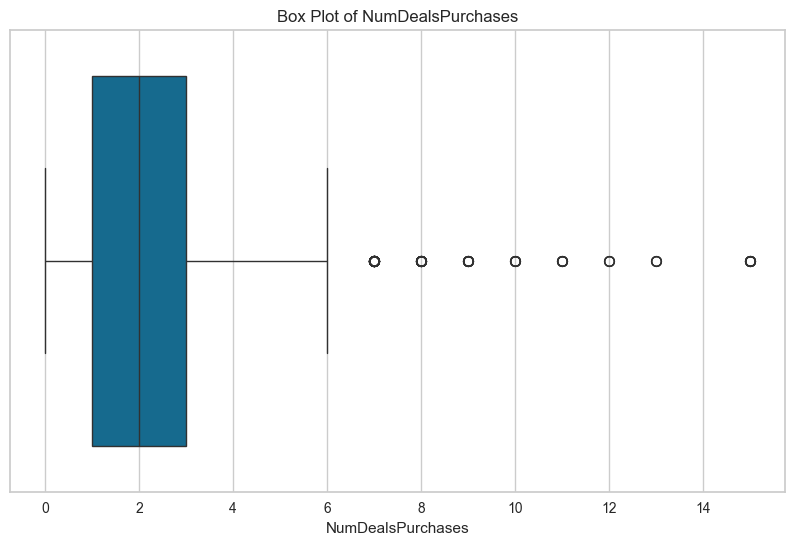

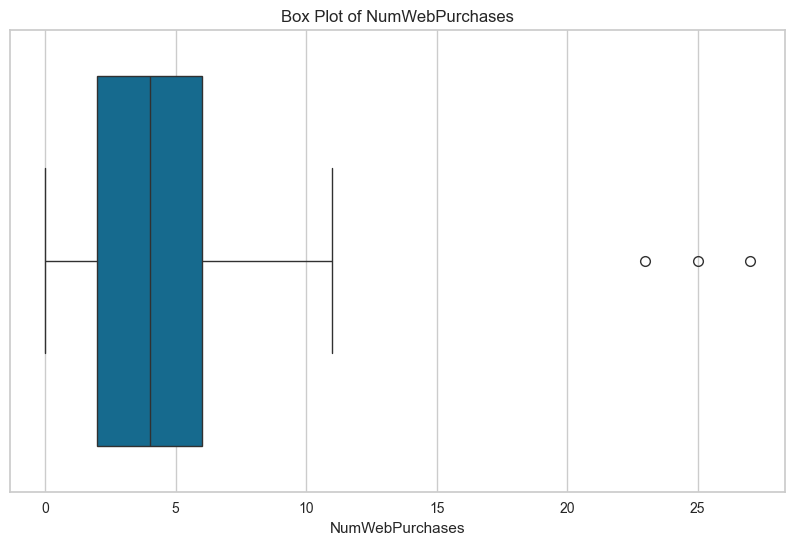

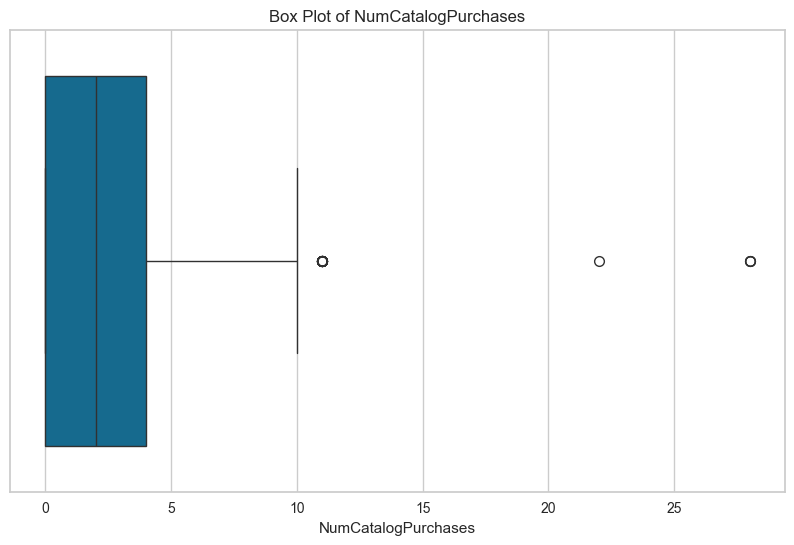

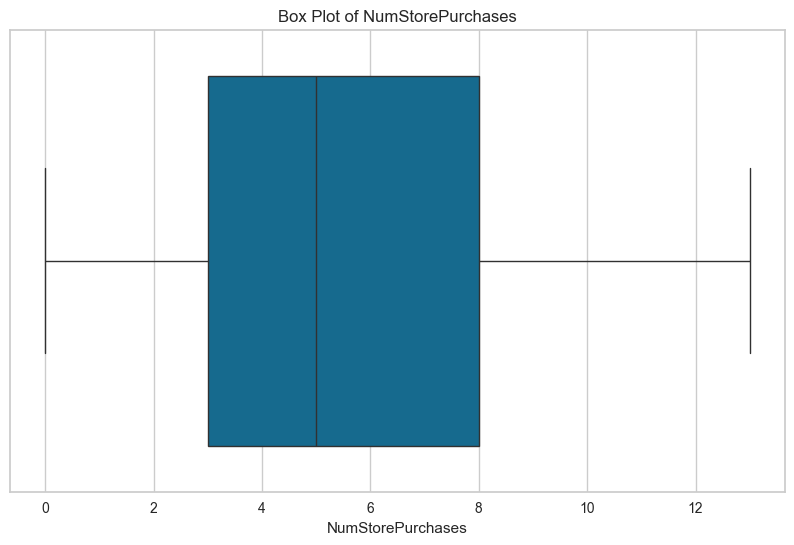

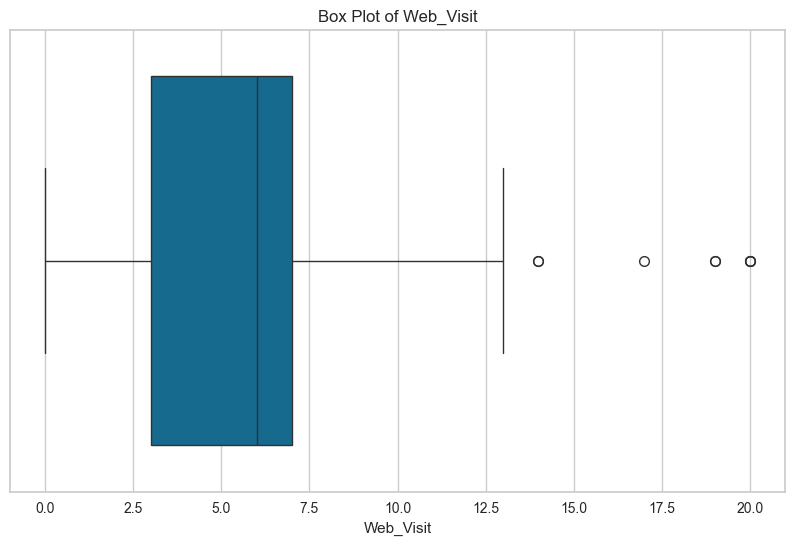

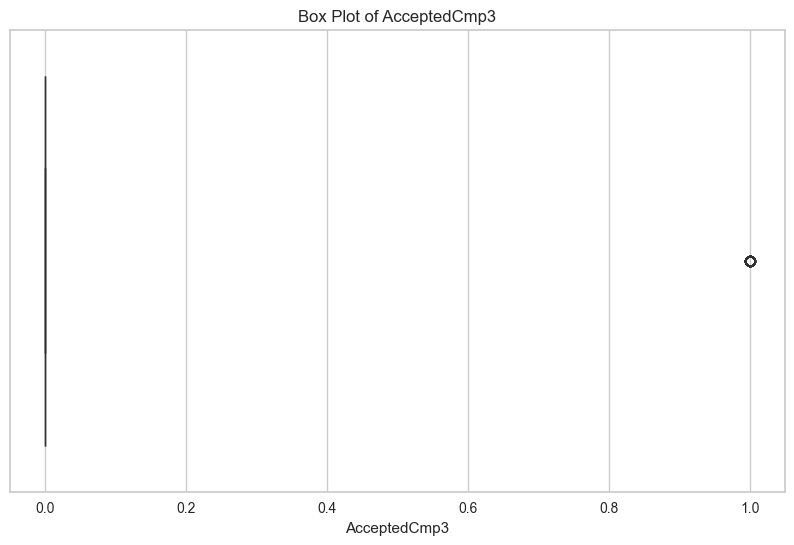

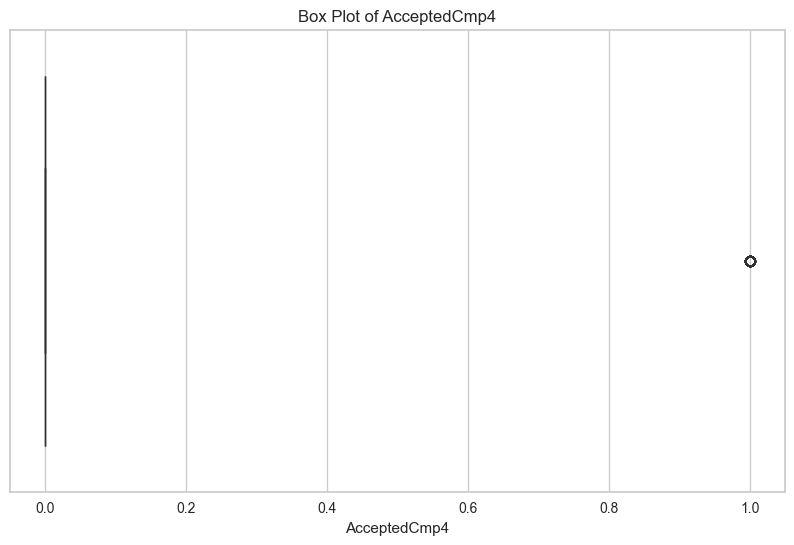

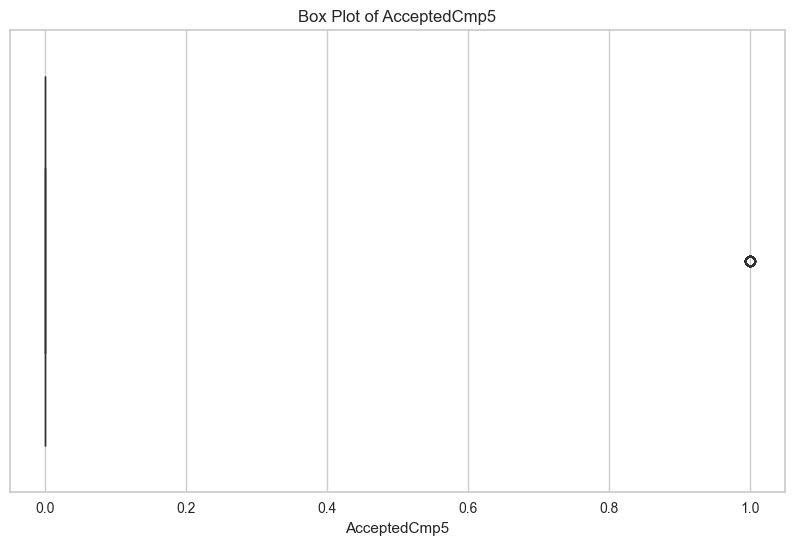

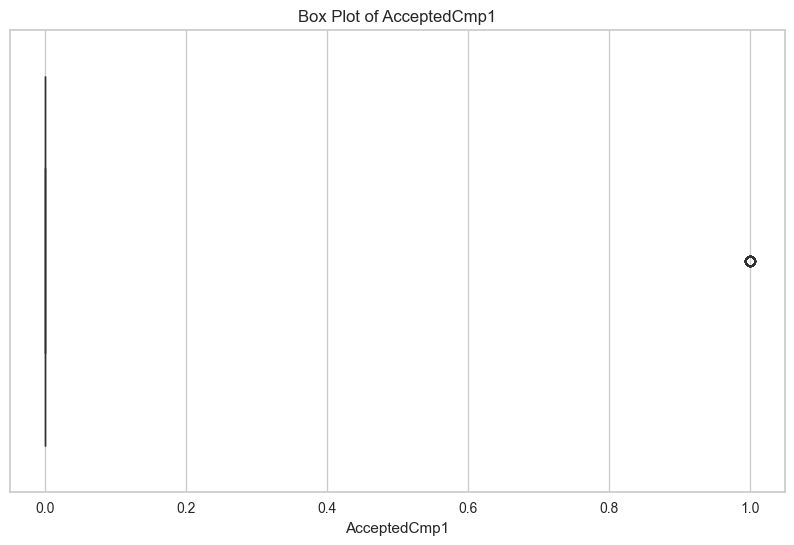

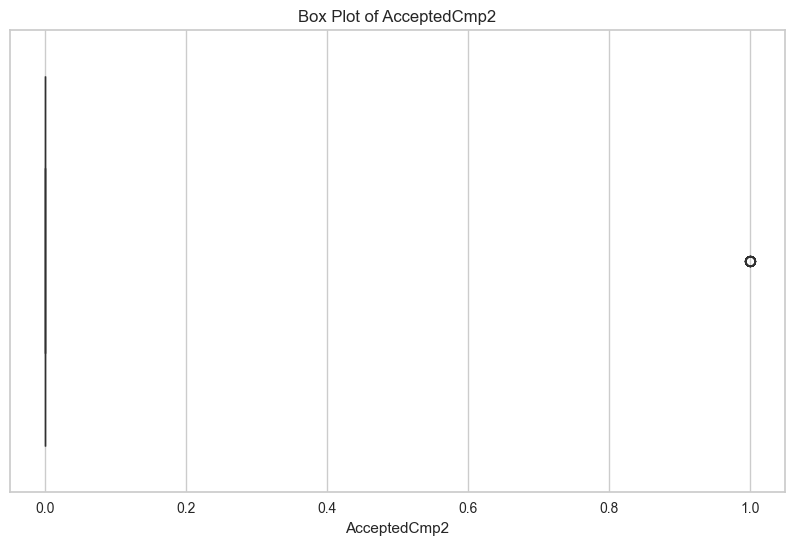

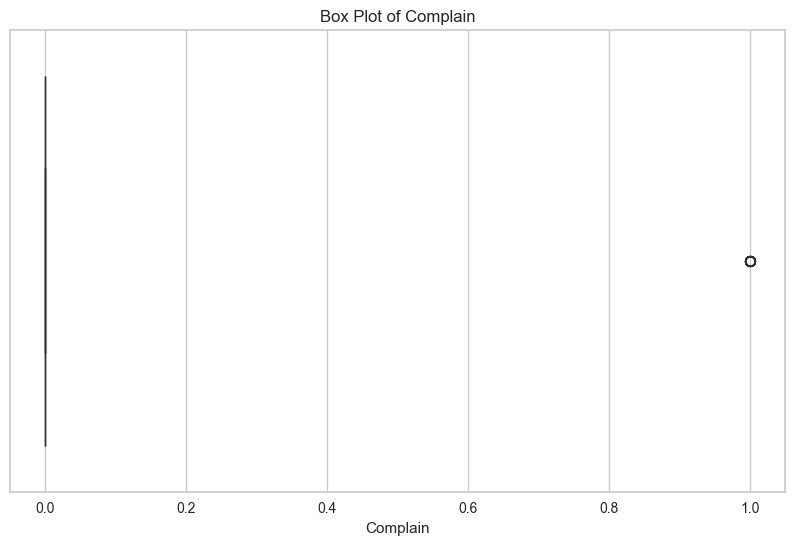

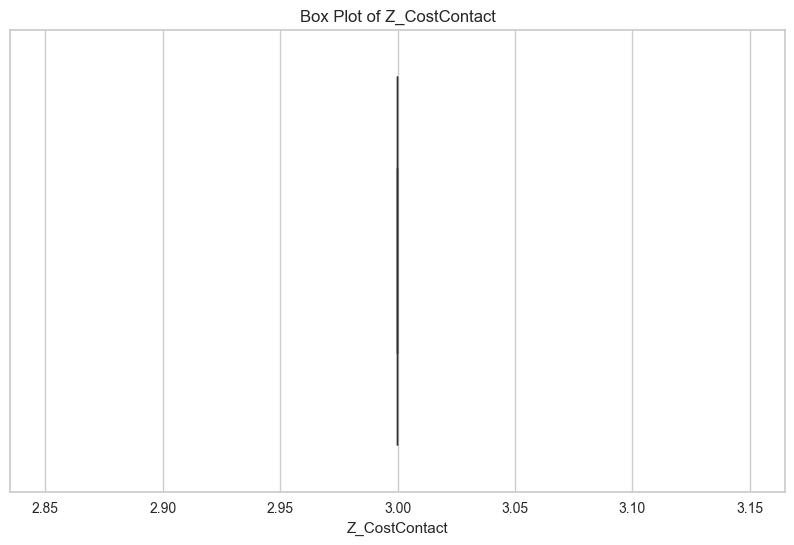

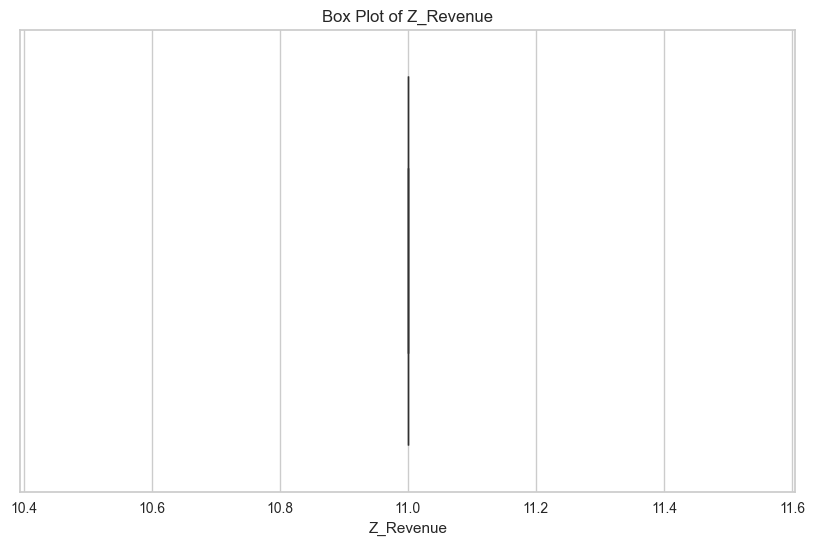

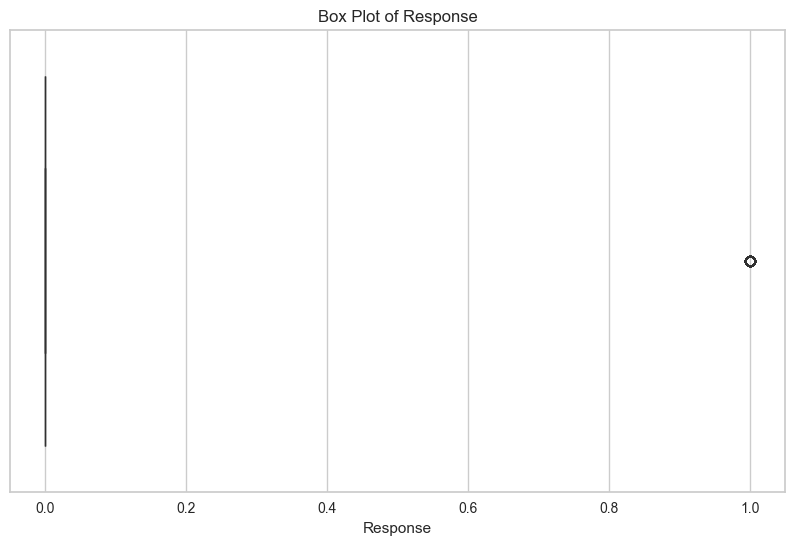

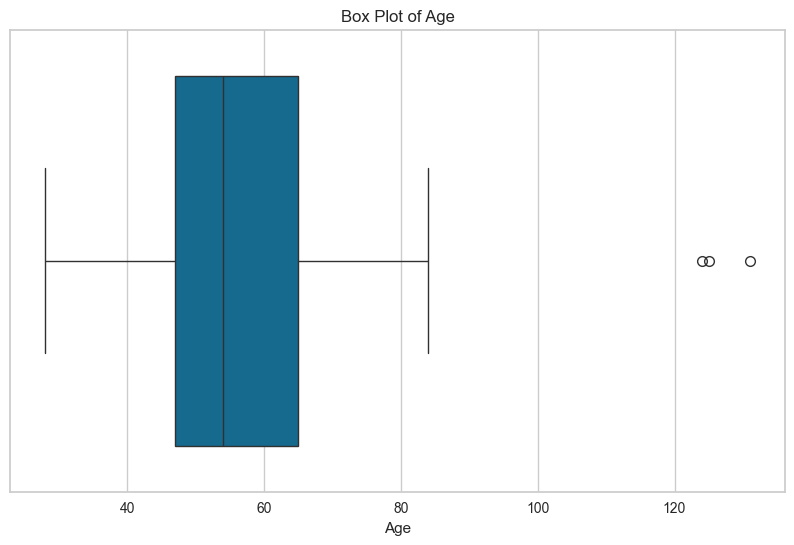

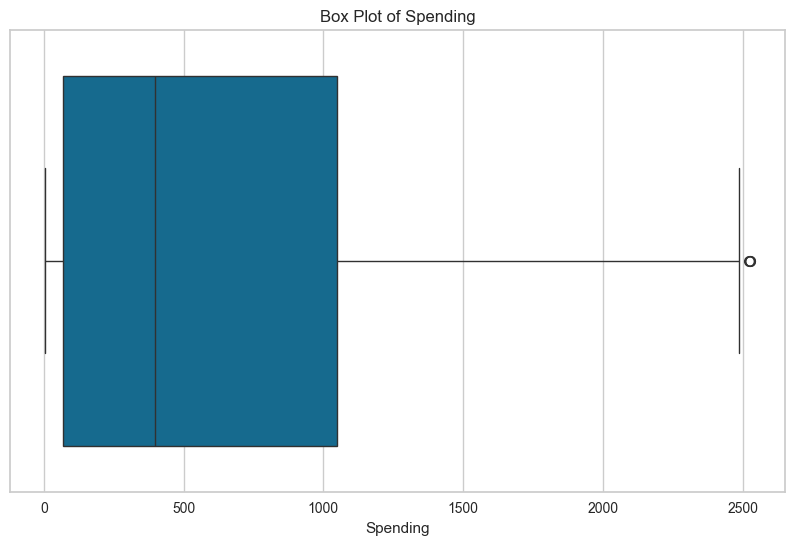

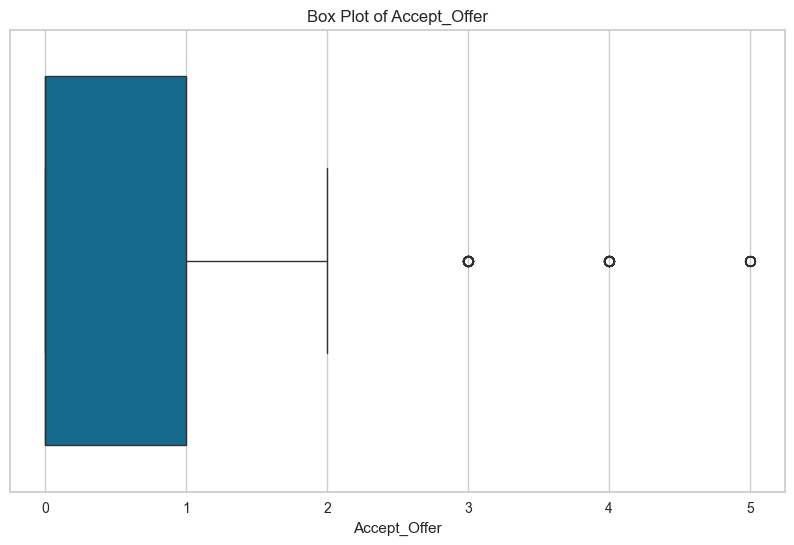

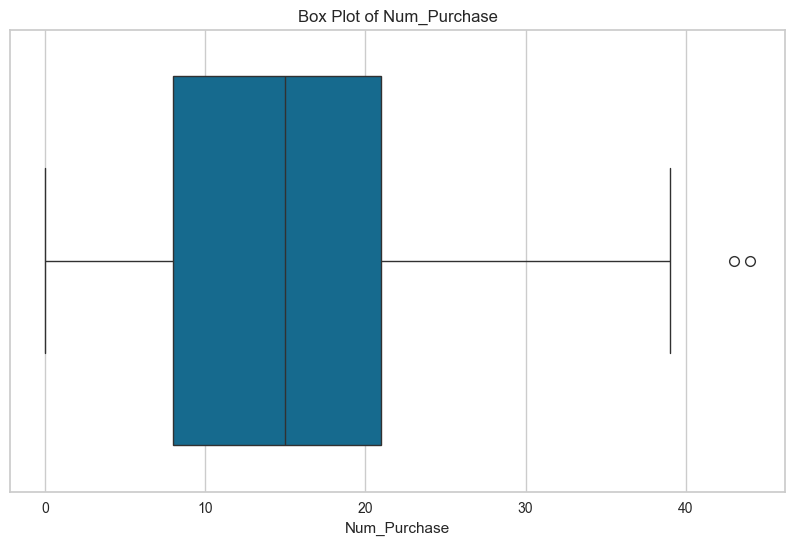

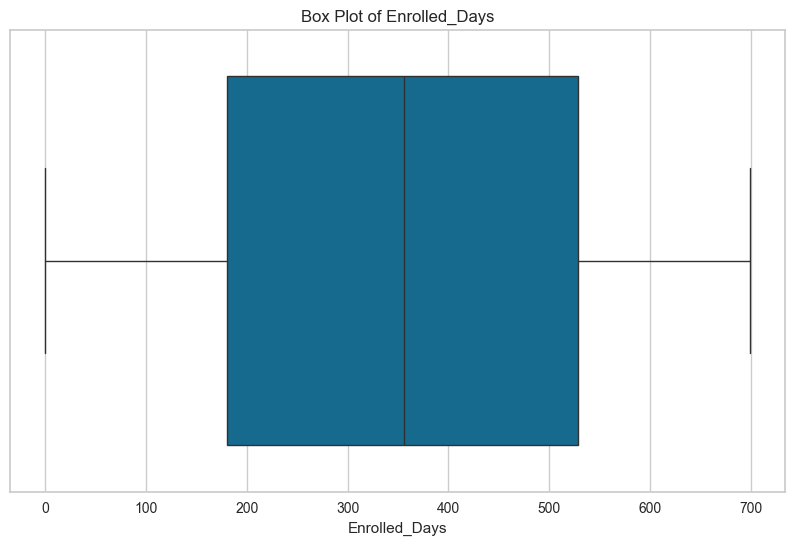

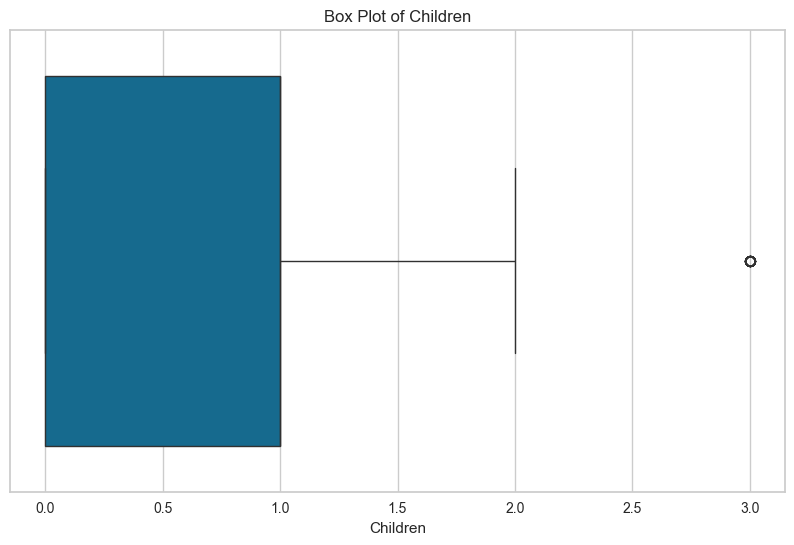

In [242]:
numeric_features = df.select_dtypes(include=["number"]).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [243]:
df = df.drop(df[(df['Income'] > 140000) | (df['Age'] > 100)].index)

In [244]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,...,0.009070,3.0,11.0,0.15102,55.095692,606.821769,0.450340,14.887982,353.718367,0.948753
std,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,...,0.094827,0.0,0.0,0.35815,11.705801,601.675284,0.894075,7.615277,202.563647,0.749231
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.00000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,3.0,11.0,0.00000,47.000000,69.000000,0.000000,8.000000,180.000000,0.000000
50%,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,...,0.000000,3.0,11.0,0.00000,54.000000,397.000000,0.000000,15.000000,356.000000,1.000000
75%,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,...,0.000000,3.0,11.0,0.00000,65.000000,1047.000000,1.000000,21.000000,529.000000,1.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,3.0,11.0,1.00000,84.000000,2525.000000,5.000000,43.000000,699.000000,3.000000


### Dataset final setelah cleaning dan preprocessing

In [245]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,0,3,11,1,67,1617,1,25,663,0
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,0,3,11,0,70,27,0,6,113,2
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,0,3,11,0,59,776,0,21,312,0
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,0,3,11,0,40,53,0,8,139,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,3,11,0,43,422,0,19,161,1


## 4. Exploratory Data Analysis

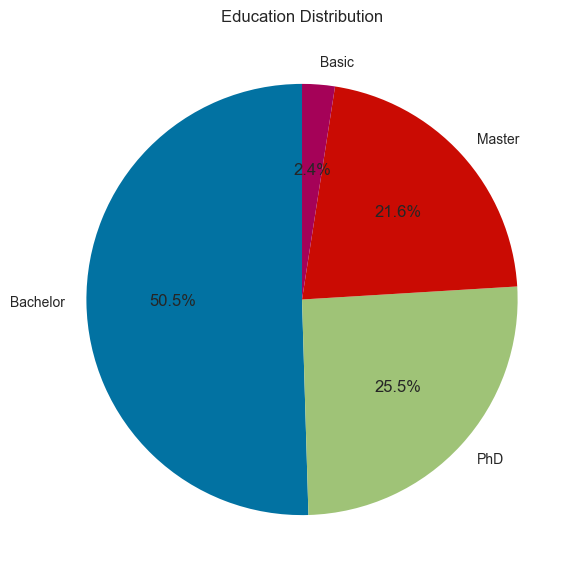

In [246]:
# Menghitung distribusi education dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Education'].value_counts(), labels=['Bachelor', 'PhD', 'Master', 'Basic'], autopct='%1.1f%%', startangle=90)
plt.title('Education Distribution')
plt.show()

In [247]:
total_spending_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spending_per_product.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
total_spending_per_product = total_spending_per_product.sort_values(ascending=False)
total_spending_per_product

Wines     675093
Meat      364513
Gold       97146
Fish       83253
Sweet      59818
Fruits     58219
dtype: int64

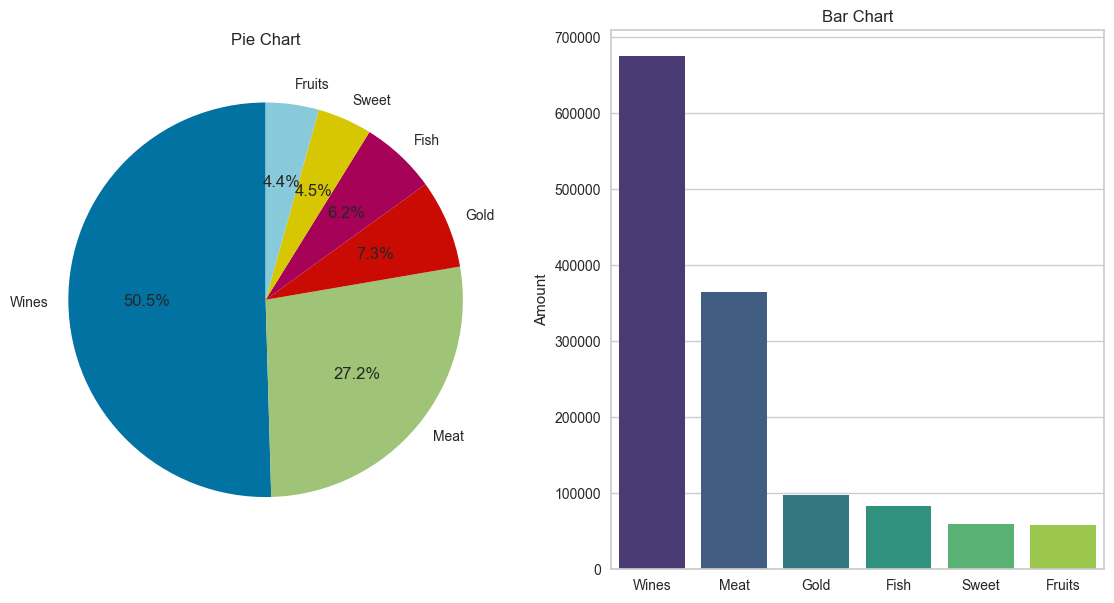

In [248]:
# Menghitung distribusi produk dan menampilkan pie chart untuk visualisasi
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))

ax1.pie(total_spending_per_product, labels=total_spending_per_product.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Pie Chart')

ax2 = sns.barplot(x=total_spending_per_product.index, y=total_spending_per_product,palette='viridis', hue=total_spending_per_product.index, legend=False)
ax2.set_ylabel('Amount')
ax2.set_xlabel(None)
plt.title('Bar Chart')
plt.show()

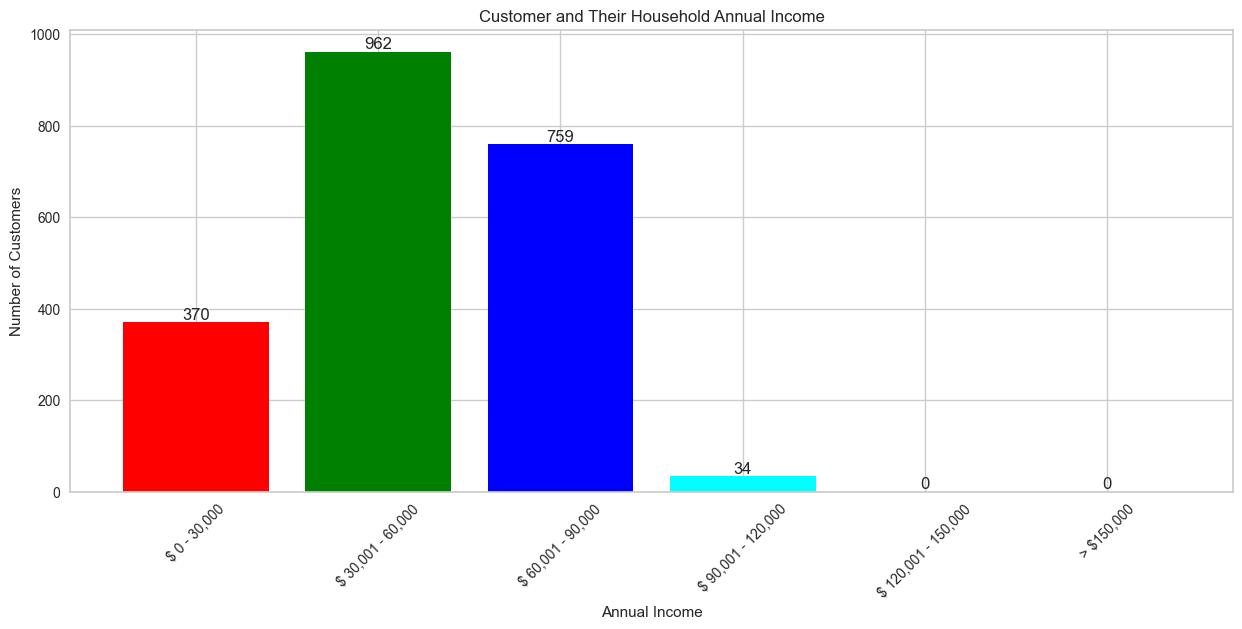

In [249]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30000)]
ai31_60 = df["Income"][(df["Income"] >= 31000) & (df["Income"] <= 60000)]
ai61_90 = df["Income"][(df["Income"] >= 61000) & (df["Income"] <= 90000)]
ai91_120 = df["Income"][(df["Income"] >= 91000) & (df["Income"] <= 120000)]
ai121_150 = df["Income"][(df["Income"] >= 121000) & (df["Income"] <= 150000)]
ai150 = df["Income"][(df["Income"] > 150000)]
 
# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000", "> $150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values), len(ai150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow', 'brown'])
plt.title("Customer and Their Household Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

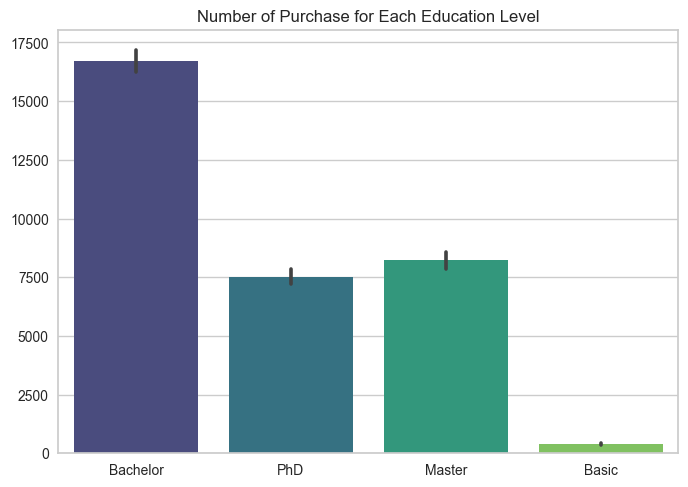

In [250]:
sns.barplot(x='Education', y='Num_Purchase', data=df, estimator='sum', palette='viridis', hue=df['Education'], legend=False)
plt.title("Number of Purchase for Each Education Level")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# **5. Data Preprocessing**

In [251]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Web_Visit', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Spending',
       'Accept_Offer', 'Num_Purchase', 'Enrolled_Days', 'Children'],
      dtype='object')

In [252]:
category_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int','float']).columns

df[category_features]

,Education,Marital_Status
0,Bachelor,Single
1,Bachelor,Single
2,Bachelor,Relationship
3,Bachelor,Relationship
4,PhD,Married
...,...,...
2235,Bachelor,Married
2236,PhD,Relationship
2237,Bachelor,Divorced
2238,Master,Relationship


In [253]:
X = pd.get_dummies(df, columns=category_features)
X

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Relationship,Marital_Status_Single,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,True,False,False,False,False,False,False,True,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,True,False,False,False,False,False,False,True,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,True,False,False,False,False,False,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,1,True,False,False,False,False,False,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,1,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,1,True,False,False,False,False,True,False,False,False
2236,64014.0,56,406,0,30,0,0,8,7,8,...,3,False,False,False,True,False,False,True,False,False
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,True,False,False,False,True,False,False,False,False
2238,69245.0,8,428,30,214,80,30,61,2,6,...,1,False,False,True,False,False,False,True,False,False


In [254]:
numeric_features = X.select_dtypes(include=["number"]).columns

scaler = StandardScaler()
X_scaled = X
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Children,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Relationship,Marital_Status_Single,Marital_Status_Widow
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,...,-1.266589,True,False,False,False,False,False,False,True,False
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,...,1.403420,True,False,False,False,False,False,False,True,False
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,...,-1.266589,True,False,False,False,False,False,True,False,False
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,...,0.068415,True,False,False,False,False,False,True,False,False
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,...,0.068415,False,False,False,True,False,True,False,False,False


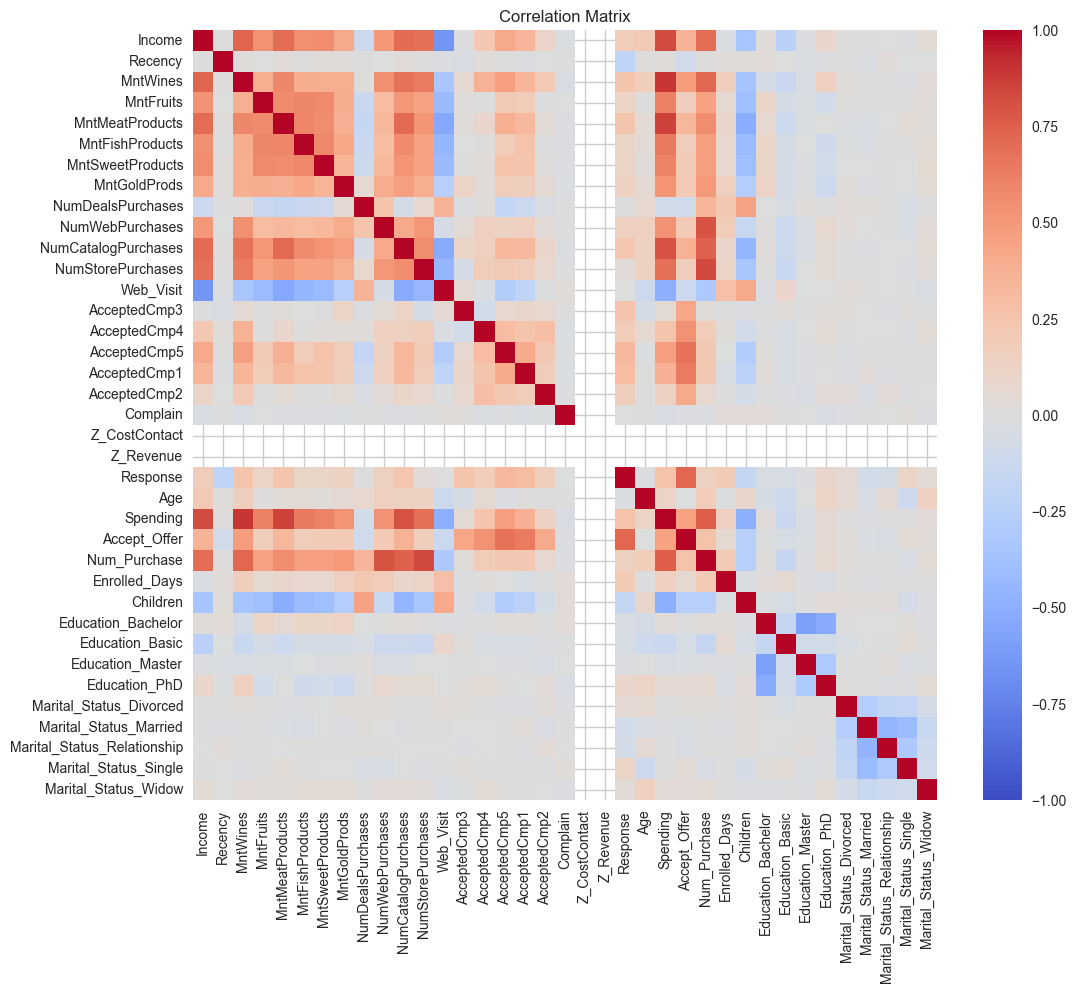

In [255]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 10))
correlation_matrix = X_scaled.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [256]:
X_scaled = X_scaled.drop(columns=['Recency','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact', 'Z_Revenue', 'Response'])

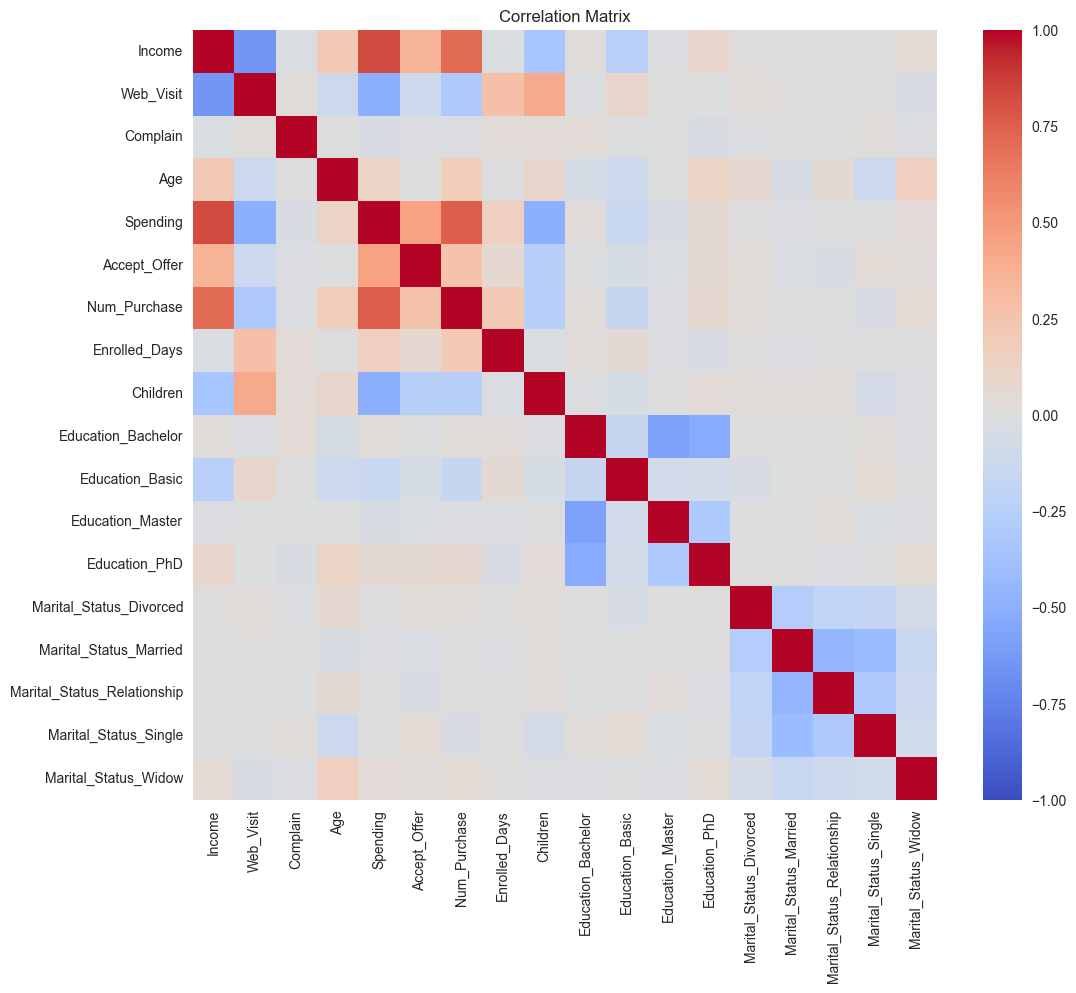

In [257]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_scaled.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [258]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2205 non-null   float64
 1   Web_Visit                    2205 non-null   float64
 2   Complain                     2205 non-null   float64
 3   Age                          2205 non-null   float64
 4   Spending                     2205 non-null   float64
 5   Accept_Offer                 2205 non-null   float64
 6   Num_Purchase                 2205 non-null   float64
 7   Enrolled_Days                2205 non-null   float64
 8   Children                     2205 non-null   float64
 9   Education_Bachelor           2205 non-null   bool   
 10  Education_Basic              2205 non-null   bool   
 11  Education_Master             2205 non-null   bool   
 12  Education_PhD                2205 non-null   bool   
 13  Marital_Status_Divorced

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [259]:
X_scaled.columns

Index(['Income', 'Web_Visit', 'Complain', 'Age', 'Spending', 'Accept_Offer',
       'Num_Purchase', 'Enrolled_Days', 'Children', 'Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Relationship', 'Marital_Status_Single',
       'Marital_Status_Widow'],
      dtype='object')

In [260]:
selected = ['Income', 'Spending', 'Num_Purchase', 'Accept_Offer']

In [261]:
k = 3

In [262]:
AC = AgglomerativeClustering(n_clusters=k)
# fit model and predict clusters
pred = AC.fit_predict(X_scaled[selected])
score = silhouette_score(X_scaled[selected], AC.labels_)
print(f'k={k}, Silhouette Score: {score}')

df_clustered = df.copy()
df_clustered['Cluster'] = pred

k=3, Silhouette Score: 0.4409596049207569


In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled[selected])
df_pca = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

In [264]:
AC = AgglomerativeClustering(n_clusters=k)
# fit model and predict clusters
pred = AC.fit_predict(df_pca)
score = silhouette_score(df_pca, AC.labels_)
print(f'k={k}, Silhouette Score: {score}')

df_clustered = df.copy()
df_clustered['Cluster'] = pred + 1
df_pca['Cluster'] = pred + 1

k=3, Silhouette Score: 0.5679359240208398


In [265]:
df_clustered

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,3,11,1,67,1617,1,25,663,0,2
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,3,11,0,70,27,0,6,113,2,1
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,3,11,0,59,776,0,21,312,0,2
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,3,11,0,40,53,0,8,139,1,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,3,11,0,43,422,0,19,161,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Bachelor,Married,61223.0,46,709,43,182,42,118,247,...,3,11,0,57,1341,0,18,381,1,2
2236,PhD,Relationship,64014.0,56,406,0,30,0,0,8,...,3,11,0,78,444,1,22,19,3,2
2237,Bachelor,Divorced,56981.0,91,908,48,217,32,12,24,...,3,11,0,43,1241,1,19,155,0,2
2238,Master,Relationship,69245.0,8,428,30,214,80,30,61,...,3,11,0,68,843,0,23,156,1,2


## **b. Evaluasi Model Clustering**

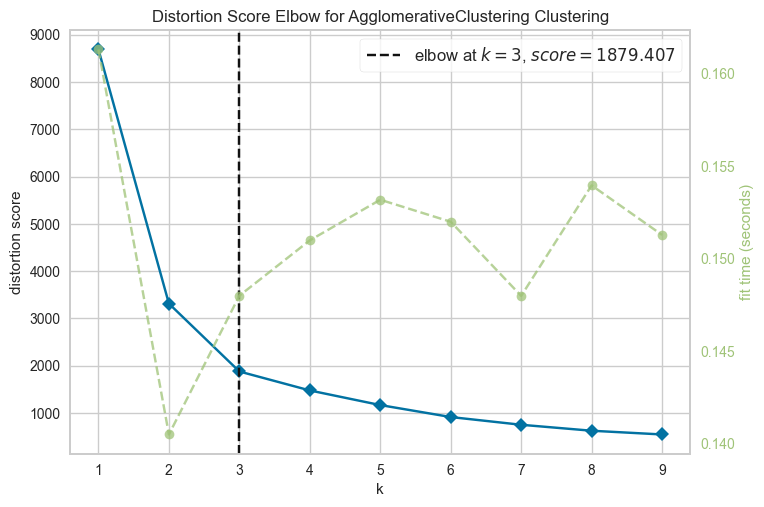

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [266]:
# Inisialisasi model KMeans tanpa parameter awal
AC = AgglomerativeClustering(n_clusters=3)
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(AC, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_pca)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **d. Visualisasi Hasil Clustering**

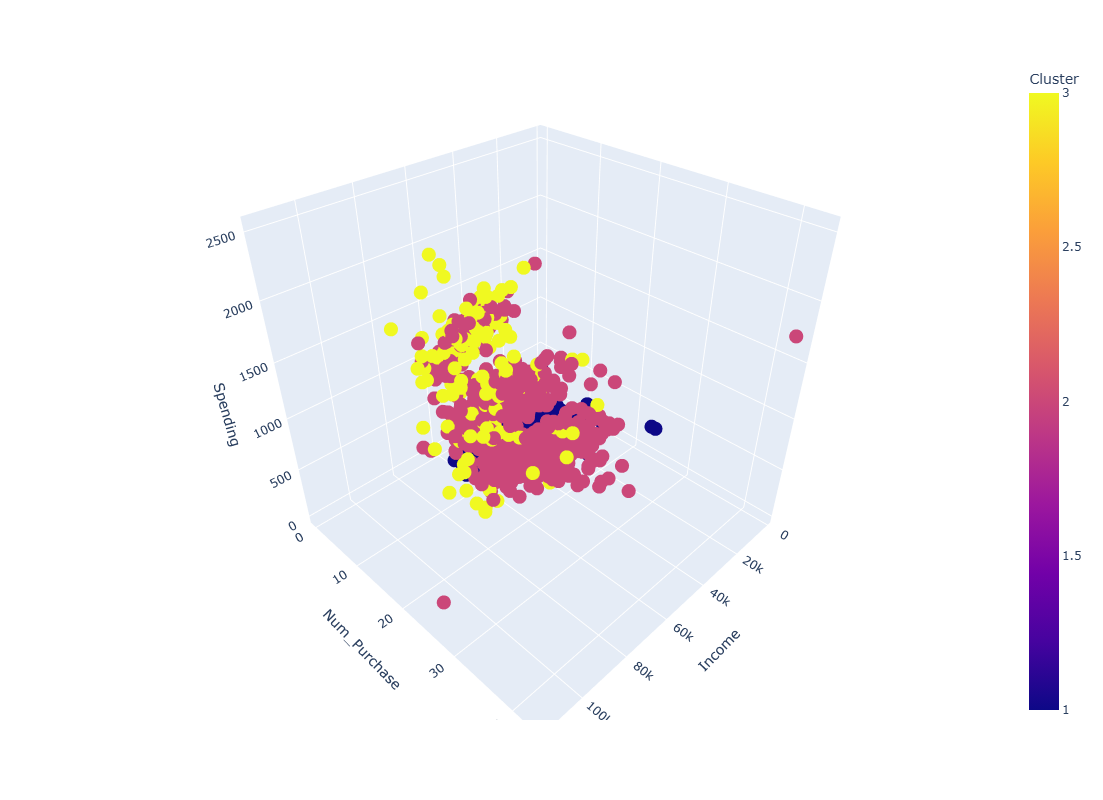

In [268]:
fig = px.scatter_3d(df_clustered, x="Income", y="Num_Purchase", z="Spending", color='Cluster', width=800, height=800)
fig.show()

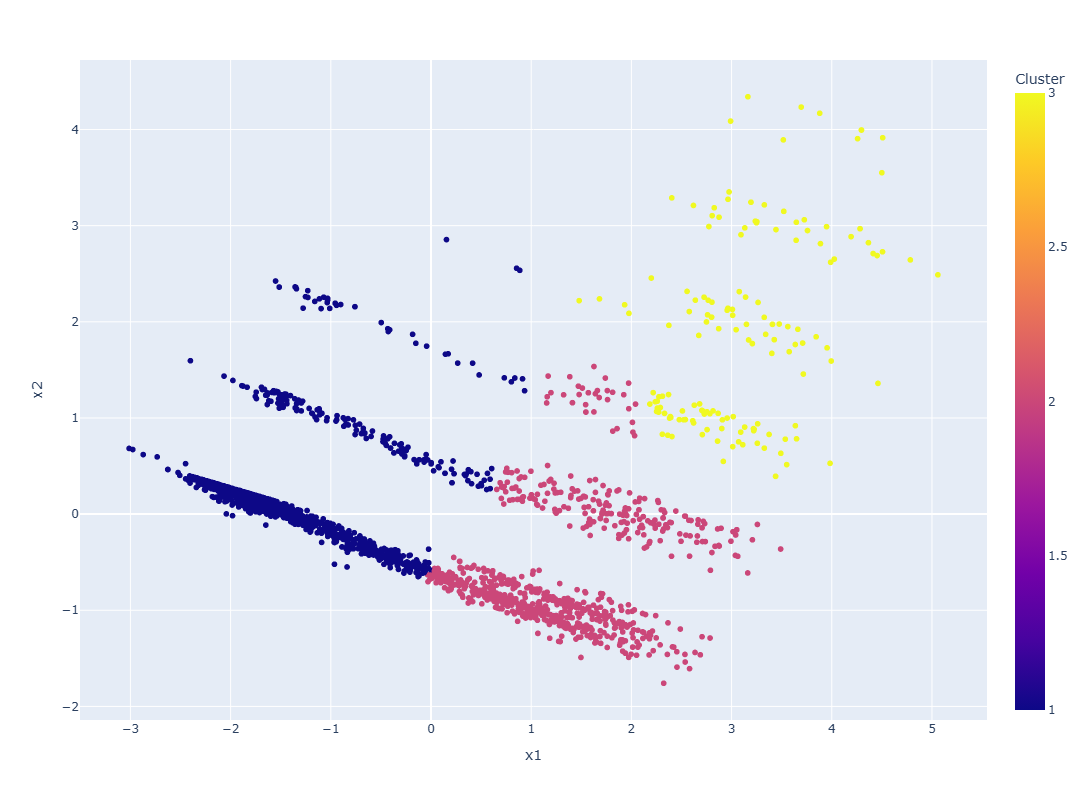

In [269]:
fig = px.scatter(df_pca, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Distribusi Kolom Numerik

In [270]:
df_clustered[df_clustered['Cluster']==1].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,...,1207.0,1207.0,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.0
mean,36488.717481,48.515327,68.164043,6.891466,31.952775,10.136703,6.748136,21.077051,2.268434,2.628003,...,3.0,11.0,0.104391,53.425021,144.970174,0.207954,9.274234,334.732394,1.213753,1.0
std,12800.387061,29.131791,88.456891,12.628405,36.688080,18.465567,12.133770,30.311154,1.580097,1.976221,...,0.0,0.0,0.305894,11.142562,143.603814,0.499422,4.444445,201.121179,0.695193,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,27208.000000,24.000000,10.000000,1.000000,9.000000,2.000000,1.000000,5.000000,1.000000,1.000000,...,3.0,11.0,0.000000,46.000000,43.000000,0.000000,6.000000,154.000000,1.000000,1.0
50%,36736.000000,49.000000,29.000000,3.000000,18.000000,4.000000,3.000000,12.000000,2.000000,2.000000,...,3.0,11.0,0.000000,52.000000,78.000000,0.000000,8.000000,326.000000,1.000000,1.0
75%,45863.000000,74.000000,96.500000,7.000000,43.000000,11.000000,8.000000,25.500000,3.000000,3.000000,...,3.0,11.0,0.000000,61.000000,218.500000,0.000000,12.000000,502.000000,2.000000,1.0
max,71322.000000,99.000000,691.000000,151.000000,270.000000,179.000000,157.000000,321.000000,15.000000,25.000000,...,3.0,11.0,1.000000,84.000000,835.000000,3.000000,25.000000,699.000000,3.000000,1.0


In [271]:
df_clustered[df_clustered['Cluster']==2].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,...,841.0,841.0,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.0
mean,67879.845422,50.380499,539.640904,48.843044,300.523187,69.116528,49.894174,70.598098,2.582640,5.895363,...,3.0,11.0,0.102259,57.694411,1078.615933,0.330559,21.717004,375.865636,0.699168,2.0
std,10848.238322,28.414874,262.520610,47.081228,221.360576,64.222887,48.823682,57.327486,2.273163,2.499712,...,0.0,0.0,0.303169,11.593331,403.173147,0.550005,4.503788,203.175076,0.685643,0.0
min,2447.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,29.000000,277.000000,0.000000,10.000000,0.000000,0.000000,2.0
25%,60597.000000,27.000000,347.000000,12.000000,132.000000,17.000000,12.000000,28.000000,1.000000,4.000000,...,3.0,11.0,0.000000,49.000000,777.000000,0.000000,19.000000,209.000000,0.000000,2.0
50%,67546.000000,52.000000,499.000000,33.000000,235.000000,50.000000,33.000000,53.000000,2.000000,6.000000,...,3.0,11.0,0.000000,58.000000,1029.000000,0.000000,22.000000,395.000000,1.000000,2.0
75%,75702.000000,73.000000,708.000000,74.000000,419.000000,104.000000,76.000000,100.000000,3.000000,8.000000,...,3.0,11.0,0.000000,67.000000,1336.000000,1.000000,25.000000,551.000000,1.000000,2.0
max,113734.000000,99.000000,1449.000000,199.000000,1725.000000,259.000000,262.000000,249.000000,15.000000,27.000000,...,3.0,11.0,1.000000,83.000000,2525.000000,2.000000,43.000000,698.000000,3.000000,2.0


In [272]:
df_clustered[df_clustered['Cluster']==3].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,...,157.0,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,80878.261146,45.458599,885.229299,56.203822,466.280255,82.108280,61.859873,78.55414,1.286624,5.808917,...,3.0,11.0,0.770701,54.019108,1630.235669,2.955414,21.464968,381.044586,0.248408,3.0
std,10137.546690,29.885999,328.704155,51.376531,261.768121,66.607786,52.013245,62.73718,1.291247,2.224957,...,0.0,0.0,0.421727,13.900042,418.854836,0.942881,4.315340,196.313765,0.538945,0.0
min,48192.000000,0.000000,152.000000,0.000000,45.000000,0.000000,0.000000,0.00000,0.000000,2.000000,...,3.0,11.0,0.000000,29.000000,416.000000,2.000000,12.000000,6.000000,0.000000,3.0
25%,75261.000000,19.000000,693.000000,21.000000,265.000000,31.000000,24.000000,33.00000,1.000000,4.000000,...,3.0,11.0,1.000000,42.000000,1379.000000,2.000000,18.000000,218.000000,0.000000,3.0
50%,81574.000000,40.000000,934.000000,35.000000,449.000000,59.000000,43.000000,56.00000,1.000000,5.000000,...,3.0,11.0,1.000000,53.000000,1676.000000,3.000000,21.000000,403.000000,0.000000,3.0
75%,87679.000000,71.000000,1092.000000,80.000000,687.000000,120.000000,95.000000,119.00000,1.000000,7.000000,...,3.0,11.0,1.000000,66.000000,1919.000000,4.000000,25.000000,557.000000,0.000000,3.0
max,105471.000000,99.000000,1493.000000,190.000000,974.000000,250.000000,194.000000,245.00000,11.000000,11.000000,...,3.0,11.0,1.000000,80.000000,2525.000000,5.000000,34.000000,697.000000,3.000000,3.0


### Sebaran Income tiap Cluster

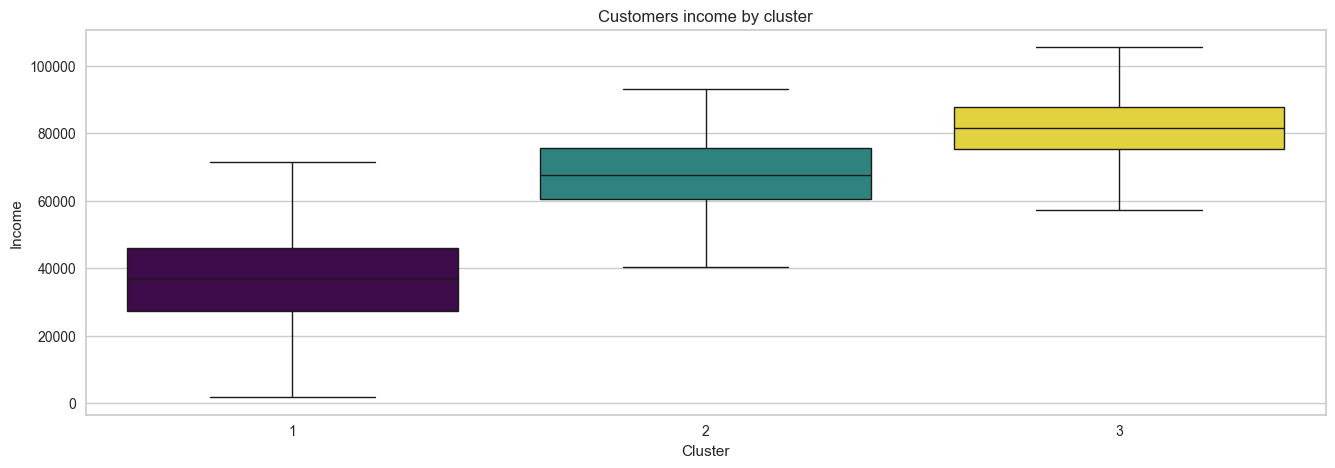

In [273]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Income',hue='Cluster', legend=False, palette='viridis', showfliers=False)
plt.show()

### Sebaran Spending tiap Cluster

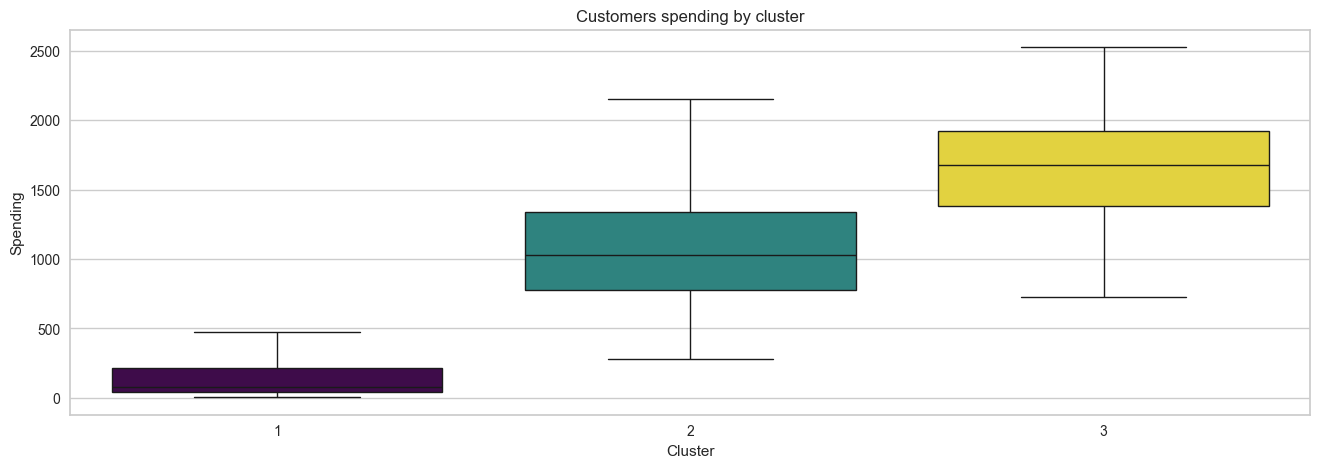

In [274]:
plt.figure(figsize=(16,5))
plt.title(f'Customers spending by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Spending',hue='Cluster', legend=False, palette='viridis', showfliers=False)
plt.show()

### Sebaran Jumlah Pembelian tiap Cluster

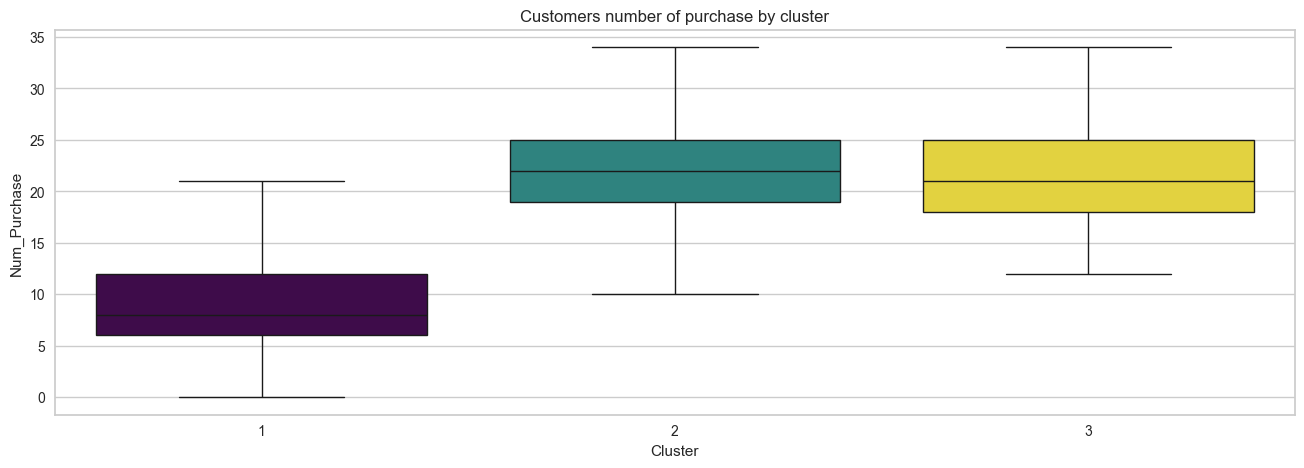

In [275]:
plt.figure(figsize=(16,5))
plt.title(f'Customers number of purchase by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Num_Purchase',hue='Cluster', legend=False, palette='viridis', showfliers=False)
plt.show()

### Sebaran Jumlah Anak tiap Cluster

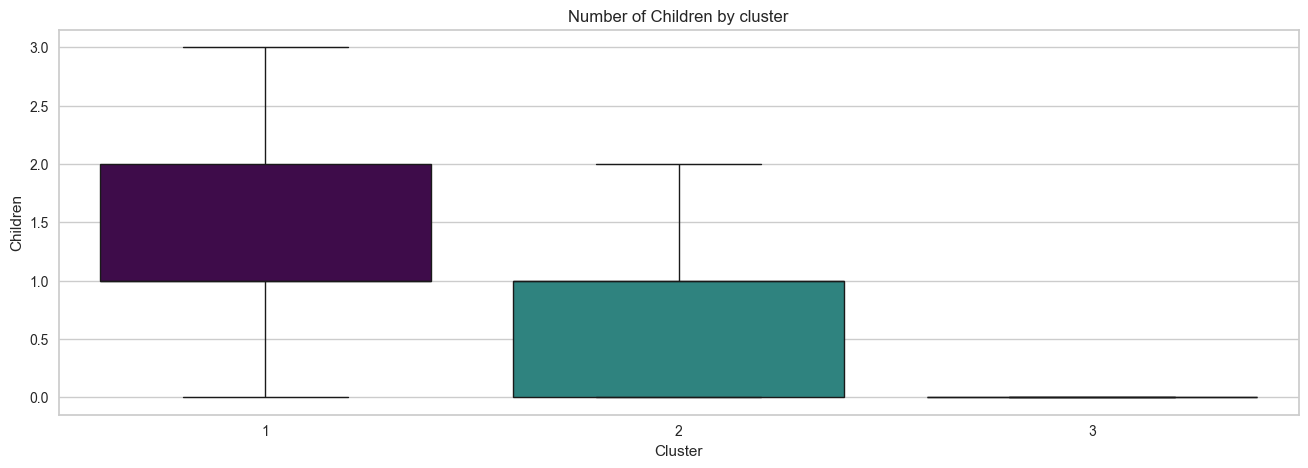

In [276]:
plt.figure(figsize=(16,5))
plt.title(f'Number of Children by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Children',hue='Cluster', legend=False, palette='viridis', showfliers=False)
plt.show()

### Jumlah Website Diakses tiap Cluster

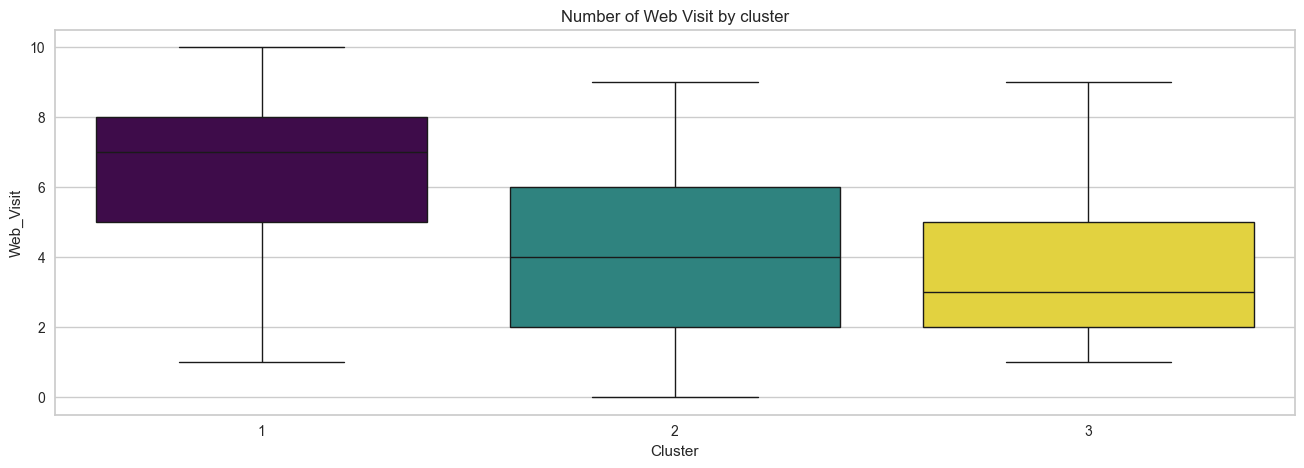

In [277]:
plt.figure(figsize=(16,5))
plt.title(f'Number of Web Visit by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Web_Visit',hue='Cluster', legend=False, palette='viridis', showfliers=False)
plt.show()

### Perbandingan Education tiap Cluster

In [278]:
df_cluster1 = df_clustered[df_clustered["Cluster"]==1]
df_cluster2 = df_clustered[df_clustered["Cluster"]==2]
df_cluster3 = df_clustered[df_clustered["Cluster"]==3]

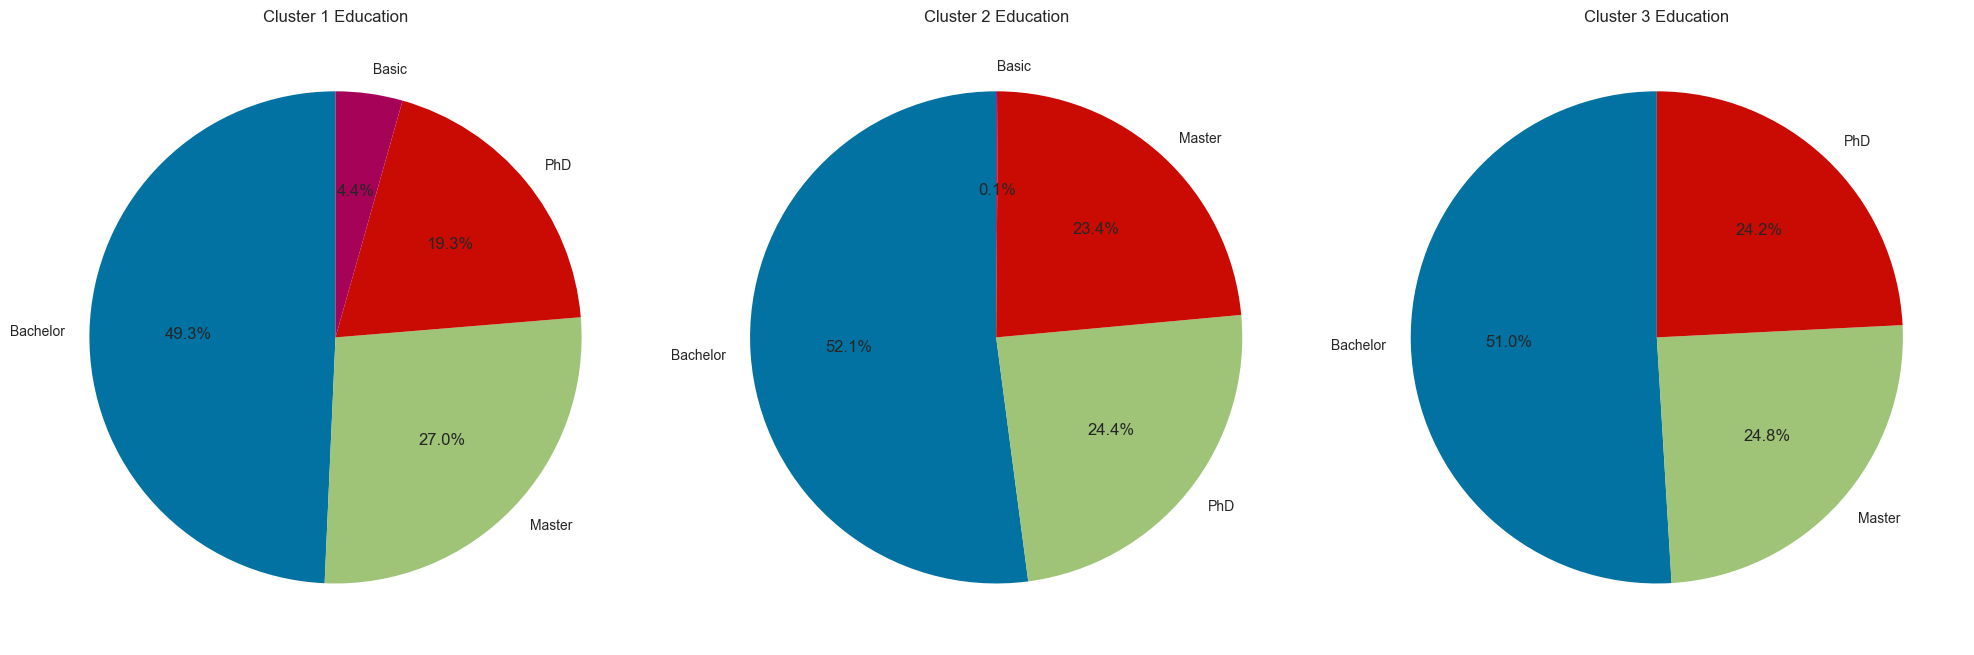

In [279]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    cluster_counts = cluster_df['Education'].value_counts()
    ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1} Education')

plt.tight_layout()

if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


### Perbandingan Marital Status tiap Cluster

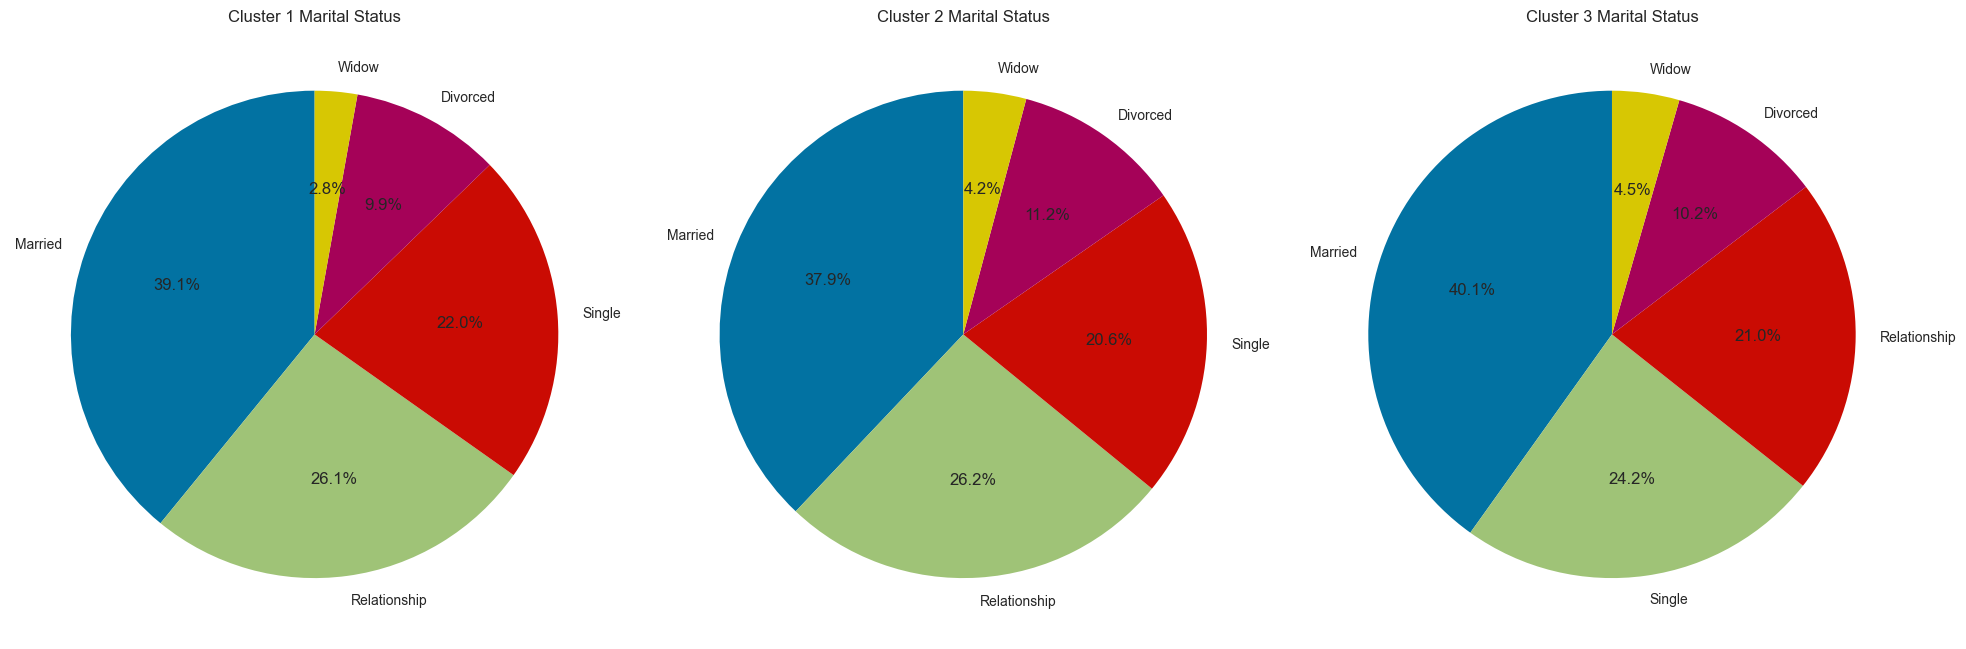

In [280]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    cluster_counts = cluster_df['Marital_Status'].value_counts()
    ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1} Marital Status')

plt.tight_layout()

if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


### Perbandingan Tempat Belanja tiap Cluster

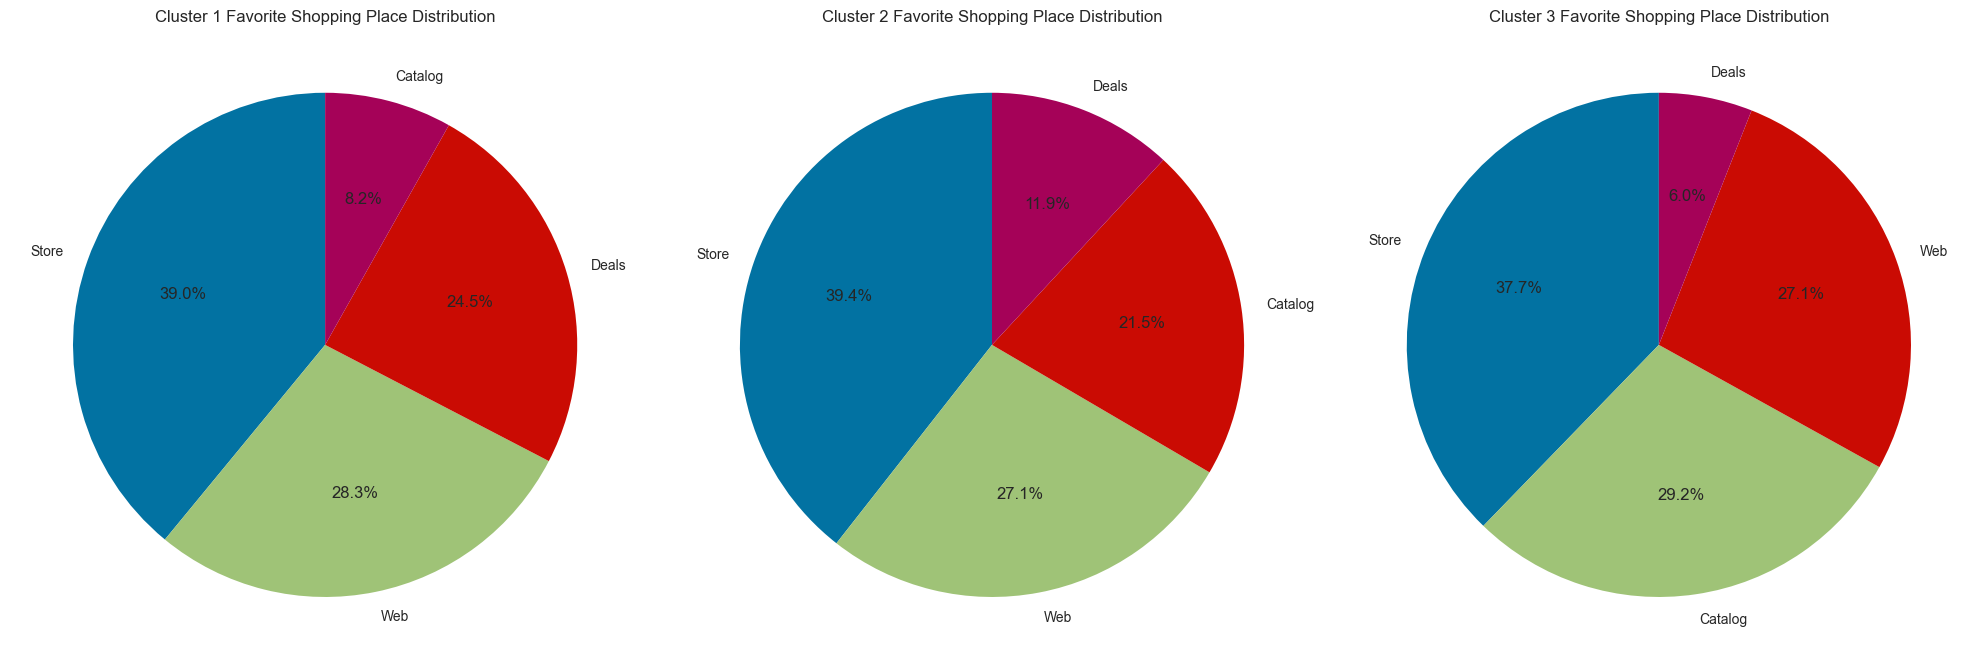

In [294]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    numPurchase_per_place = cluster_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
    numPurchase_per_place.index = ['Deals', 'Web', 'Catalog', 'Store']
    numPurchase_per_place = numPurchase_per_place.sort_values(ascending=False)
    ax.pie(numPurchase_per_place, labels=numPurchase_per_place.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1} Favorite Shopping Place Distribution')

plt.tight_layout()

if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


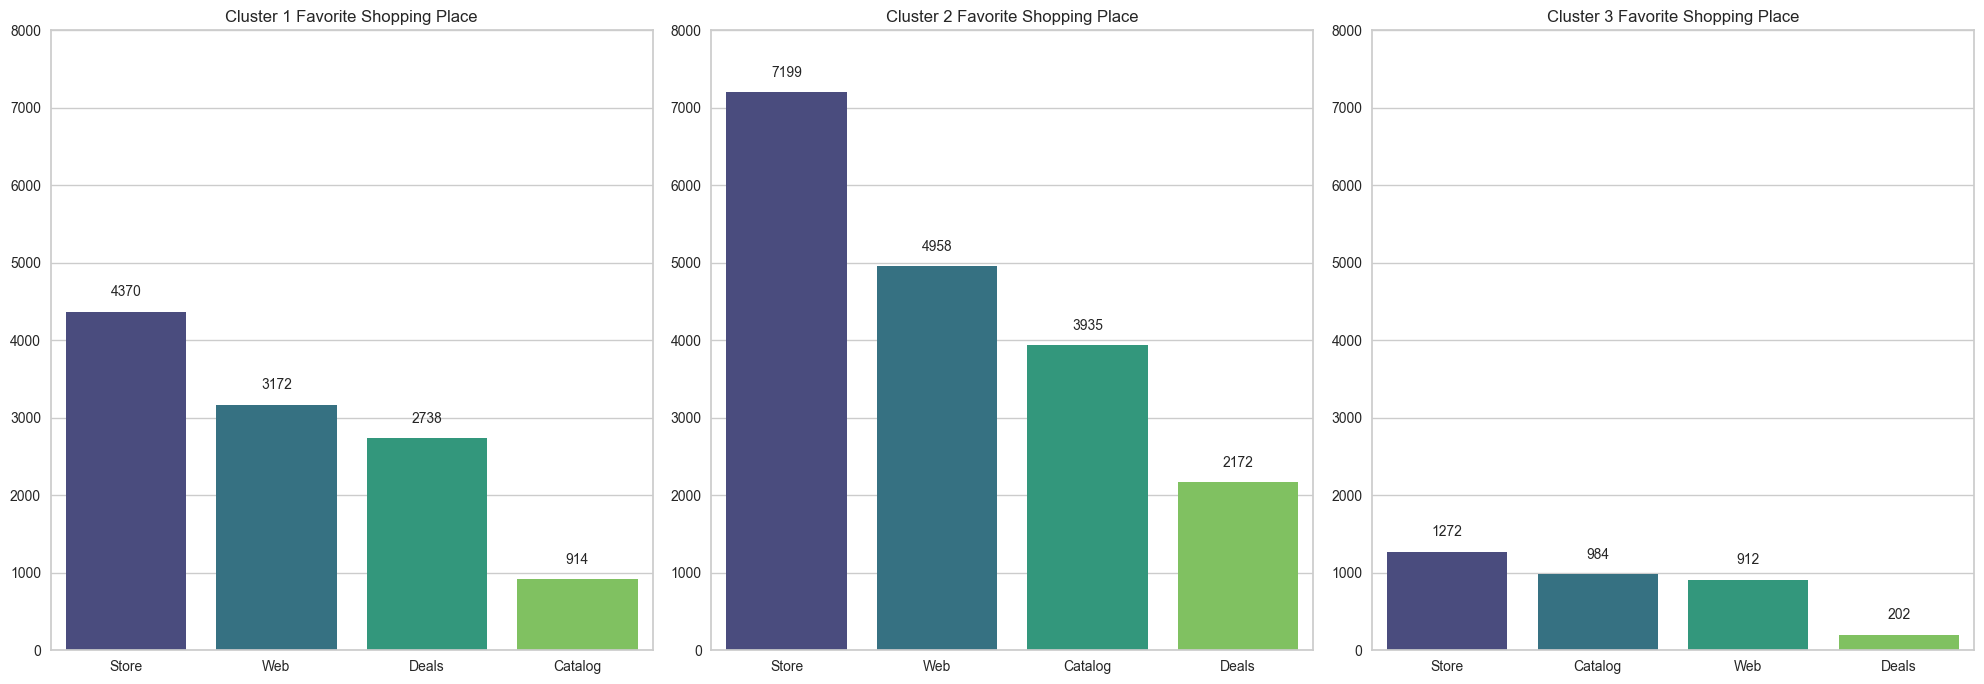

In [288]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    numPurchase_per_place = cluster_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
    numPurchase_per_place.index = ['Deals', 'Web', 'Catalog', 'Store']
    numPurchase_per_place = numPurchase_per_place.sort_values(ascending=False)
    bars = sns.barplot(
        x=numPurchase_per_place.index,
        y=numPurchase_per_place,
        palette='viridis',
        hue=numPurchase_per_place.index,
        ax=ax
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim(0, 8000)
    ax.set_title(f'Cluster {i+1} Favorite Shopping Place')
    for bar in bars.patches:
        bar_value = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_value + 8000 * 0.02,
            f'{bar_value:.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


### Perbandingan Produk yang Sering Dibeli tiap Cluster

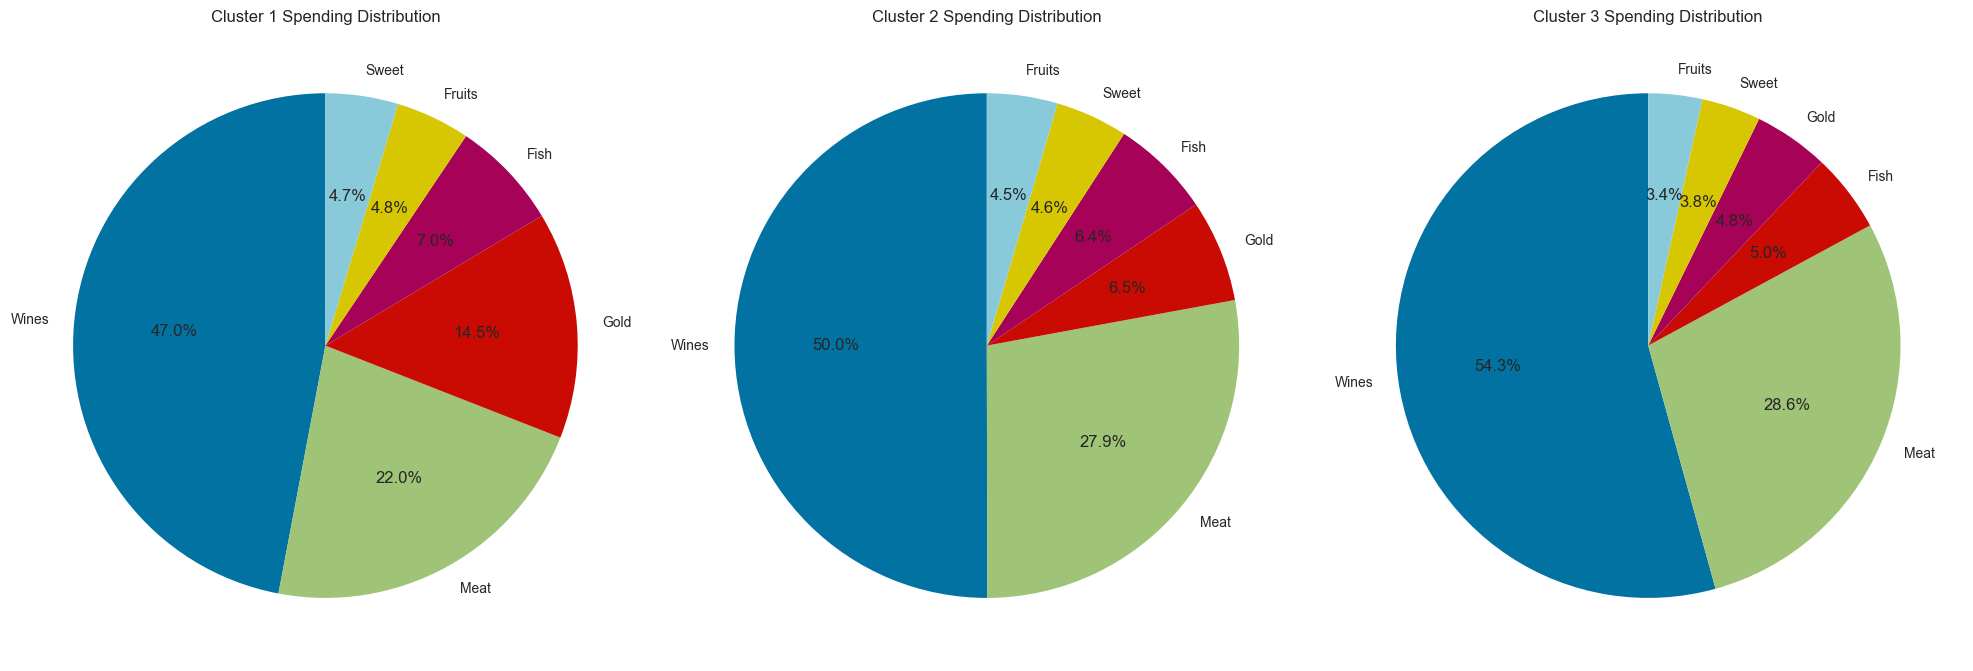

In [282]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    total_spending = cluster_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
    total_spending.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    total_spending = total_spending.sort_values(ascending=False)
    ax.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1} Spending Distribution')

plt.tight_layout()

if len(clusters) < len(axes):
    for ax in axes[len(clusters):]:
        ax.axis('off')

plt.show()


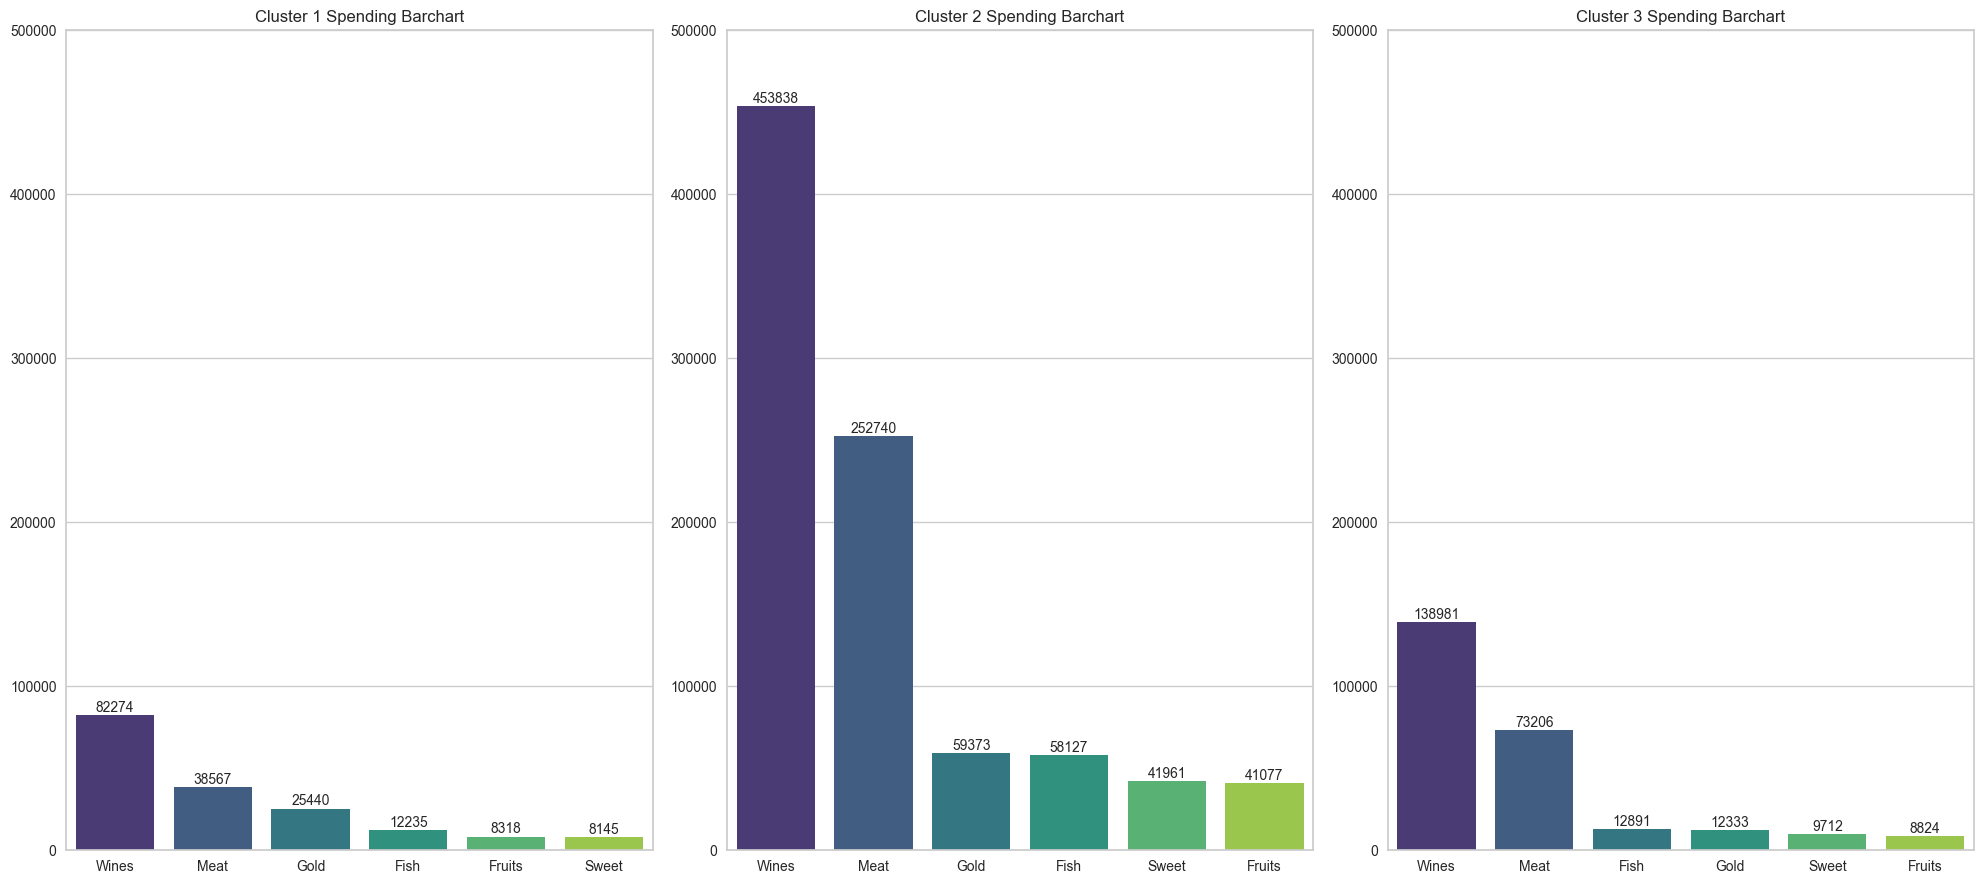

In [283]:
fig, axes = plt.subplots(1, 3, figsize=(20, 9))
axes = axes.flatten()

clusters = [df_cluster1, df_cluster2, df_cluster3]

for i, (cluster_df, ax) in enumerate(zip(clusters, axes)):
    total_spending = cluster_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
    total_spending.index = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
    total_spending = total_spending.sort_values(ascending=False)
    bars = sns.barplot(
        x=total_spending.index,
        y=total_spending,
        palette='viridis',
        hue=total_spending.index,
        ax=ax
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_ylim(0, 500000)
    ax.set_title(f'Cluster {i+1} Spending Barchart')
    for bar in bars.patches:
        bar_value = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_value + 8000 * 0.02,
            f'{bar_value:.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


### Hasil Interpretasi

1. Cluster 1:
   - Memiliki income rendah, yaitu `$1,730 - $68,805` dengan rata-rata `$34,021`
   - Melakukan spending rendah, sebanyak `$5 - $601` dengan rata-rata sekitar `$103.77`
   - Jarang melakukan pembelian, yaitu sebanyak 0 - 25 kali dengan rata-rata 8 kali tiap pelanggan
   - Memiliki jumlah anak 0 - 3 anak dengan mayoritas memiliki 1 - 2 anak
   - Sebagian besar memiliki marital status Married dan Relationship
2. Cluster 2:
   - Memiliki income menengah, yaitu `$22,507 - $96,547` dengan rata-rata `$61,395`
   - Melakukan spending menengah, sebanyak `$108 - $1,828` dengan rata-rata sekitar `$792.54`
   - Sering melakukan pembelian, yaitu sebanyak 8 - 33 kali dengan rata-rata 20 kali tiap pelanggan
   - Memiliki jumlah anak 0 - 2 anak dengan mayoritas memiliki 0 - 1 anak
   - Sebagian besar memiliki marital status Married dan Relationship
3. Cluster 3:
   - Memiliki income tinggi, yaitu sekitar `$2,447 - $113,734` dengan rata-rata sekitar `$77,829`
   - Melakukan spending tinggi, sebanyak `$277 - $2,525` dengan rata-rata sekitar `$1,545.50`
   - Sering melakukan pembelian, yaitu sebanyak 12 - 43 kali dengan rata-rata 23 kali tiap pelanggan
   - Mayoritas tidak memliki anak
   - Sebagian besar memiliki marital status Married dan Single

Tambahan:
- Pelanggan Cluster 1 adalah yang paling sering mengakses website
- Pelanggan Cluster 3 lebih suka berbelanja di Catalog daripada Website

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [295]:
df_clustered.to_csv("clustered.csv", index=False)